In [1]:
import numpy as np
from scipy import random
import networkx as nx
import pandas as pd
import random
import collections
import matplotlib.pyplot as plt
import matplotlib as mplt
import os
import json
from time import time
%matplotlib inline

from matplotlib.colors import ListedColormap
from matplotlib.lines import Line2D   
from matplotlib import gridspec
import palettable as pltt
import matplotlib.font_manager as fm

plt.rcParams['xtick.major.width'] = 1.2
plt.rcParams['ytick.major.width'] = 1.2
plt.rcParams['xtick.minor.size'] = 2
plt.rcParams['xtick.minor.width'] = 1.2
plt.rcParams['ytick.minor.size'] = 2
plt.rcParams['ytick.minor.width'] = 1.2
plt.rcParams['axes.linewidth'] = 1.2

# set the font family style
mplt.rcParams['font.family'] = 'Avenir'
mplt.rcParams['pdf.fonttype'] = 42


# Empirical data

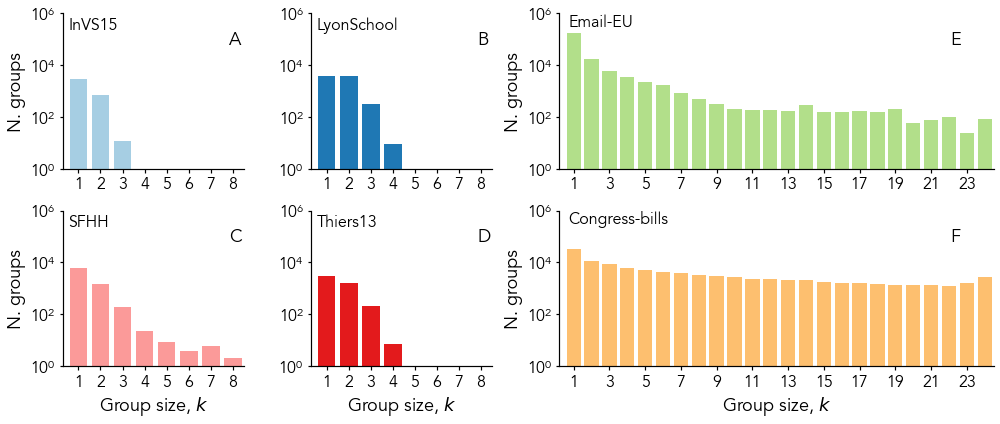

In [6]:
colors = [ListedColormap(pltt.colorbrewer.qualitative.Paired_7.mpl_colors)(i) for i in range(0,7)]

dataset_dir = '../Data/Sociopatterns/Processed_data/'
n_minutes = 15

sociopatterns_datasets = ['InVS15','LyonSchool','SFHH','Thiers13']
sociopatterns_axlabels = ['A','B','C','D']
sociopatterns_axes = [0, 1, 3, 4]
sociopatterns_colors = [0, 1, 4, 5]

other_datasets = ['Email-EU','congress-bills']
other_datasets_str = ['Email-EU','Congress-bills']

other_axlabels = ['E', 'F']
other_axes = [2, 5]
other_colors = [2, 6]

thr = 1

plt.figure(figsize=(14,6))
gs = gridspec.GridSpec(nrows=2, ncols=3, height_ratios=[1, 1], width_ratios=[1, 1, 2.4]) 

for ii, dataset in enumerate(sociopatterns_datasets):
    
    ax = plt.subplot(gs[sociopatterns_axes[ii]]) 
    
    filename = dataset_dir+'aggr_'+str(n_minutes)+'min_cliques_thr'+str(thr)+'_'+dataset+'.json'
    cliques_list = json.load(open(filename,'r'))
    size_counter = collections.Counter([len(simplex) for simplex in cliques_list])
    #shifting the keys -1 so that it matches the '1-hyperlink = group of 2' notation
    k_dict = {k-1: v for k, v in size_counter.items()}
    
    ax.bar(k_dict.keys(), k_dict.values(), color=colors[sociopatterns_colors[ii]])

    ax.tick_params(axis='both', which='major', labelsize=16)
    if ii>1: ax.set_xlabel(r'Group size, $k$', size=18)
    if ii==0 or ii==2: ax.set_ylabel(r'N. groups', size=18)
    ax.set_xticks([1,2,3,4,5,6,7,8])
    ax.set_xlim(0.3,8.5)
    ax.set_yscale('log')
    ax.set_ylim(1e0,1e6)
    
    # Hide the right and top spines
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    # Only show ticks on the left and bottom spines
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')
    
    ax.annotate(dataset, xy=(0.03, 0.9), xycoords="axes fraction", fontsize=16)
    ax.annotate(sociopatterns_axlabels[ii], xy=(0.92, 0.8), xycoords="axes fraction", fontsize=18, fontweight="bold")
    
for ii, dataset in enumerate(other_datasets):
    
    ax = plt.subplot(gs[other_axes[ii]])
    
    filename = '../Data/%s/Processed_data/%s_simplices.json'%(dataset, dataset)
    cliques_list = json.load(open(filename,'r'))
    size_counter = collections.Counter([len(simplex) for simplex in cliques_list])
    #shifting the keys -1 so that it matches the '1-hyperlink = group of 2' notation
    k_dict = {k-1: v for k, v in size_counter.items()}
    
    ax.bar(k_dict.keys(), k_dict.values(), color=colors[other_colors[ii]])

    ax.tick_params(axis='both', which='major', labelsize=16)
    if ii==1: ax.set_xlabel(r'Group size, $k$', size=18)
    ax.set_ylabel(r'N. groups', size=18)
    ax.set_xticks(np.arange(1,27,2))
    ax.set_yscale('log')
    ax.set_ylim(1e0,1e6)
    ax.set_xlim(0.2,24.5)
    
    # Hide the right and top spines
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    # Only show ticks on the left and bottom spines
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')
    
    ax.annotate(other_datasets_str[ii], xy=(0.02, 0.92), xycoords="axes fraction", fontsize=16)
    ax.annotate(other_axlabels[ii], xy=(0.9, 0.8), xycoords="axes fraction", fontsize=18, fontweight="bold")
    
plt.tight_layout()

filename = "../Figures/Datasets_hyperlinks_bars.pdf"
plt.savefig(filename, bbox_inches='tight', dpi=150)

In [8]:
def get_generalized_degrees_from_simplices(cliques_list):
    max_group_size = max([len(clique) for clique in cliques_list])
    gen_degree_dict = {}
    for k in range(1, max_group_size):
        gen_degree_dict[k] = {}

    for simplex in cliques_list:
        k = len(simplex)-1
        for n in simplex:
            try: gen_degree_dict[k][n]+=1 #incrementing the degree
            except KeyError: gen_degree_dict[k][n]=1 #adding the node (degree 1)
                
    return gen_degree_dict

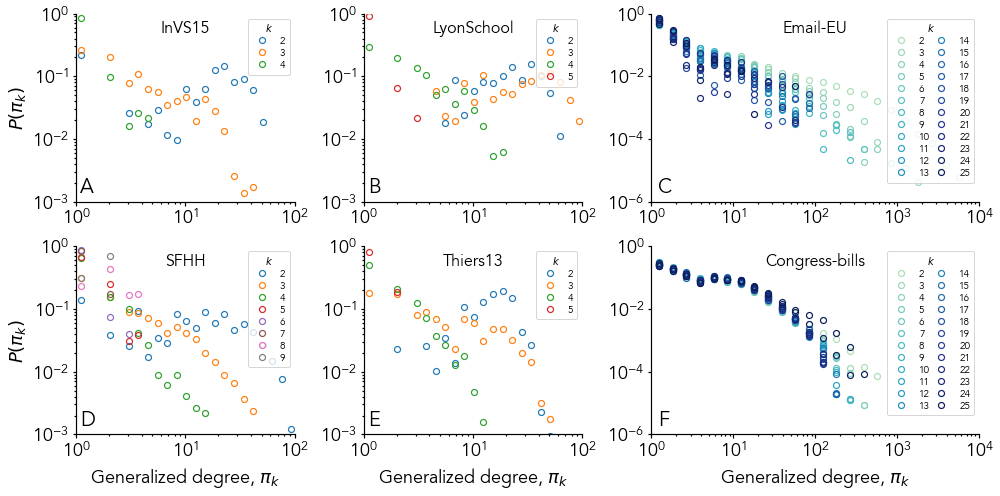

In [26]:
dataset_dir = '../Data/Sociopatterns/Processed_data/'
n_minutes = 15
thr = 1

sociopatterns_datasets = ['InVS15','LyonSchool','SFHH','Thiers13']
sociopatterns_axes = [0, 1, 3, 4]
sociopatterns_axlabels = ['A','B','D','E']


other_datasets = ['Email-EU','congress-bills']
other_datasets_str = ['Email-EU','Congress-bills']

other_axes = [2, 5]
other_axlabels = ['C', 'F']

plt.figure(figsize=(14,7))
gs = gridspec.GridSpec(nrows=2, ncols=3, height_ratios=[1, 1], width_ratios=[1, 1, 1.5]) 

for ii, dataset in enumerate(sociopatterns_datasets):
    
    filename = dataset_dir+'aggr_'+str(n_minutes)+'min_cliques_thr'+str(thr)+'_'+dataset+'.json'
    cliques_list = json.load(open(filename,'r'))
    gen_degree_dict = get_generalized_degrees_from_simplices(cliques_list)
    
    ax = plt.subplot(gs[sociopatterns_axes[ii]])
    for k, degree_dict in gen_degree_dict.items():
        density, bins = np.histogram(list(degree_dict.values()), bins=np.logspace(0,2.1,25), density=True)
        unity_density = density / density.sum()
        center = (bins[:-1] + bins[1:]) / 2
        ax.plot(center, unity_density, 'o', label=k+1, mfc='None', mew=1.2);
        
        ax.legend(title='$k$', loc='upper right', labelspacing=0.1)
    
    ax.tick_params(axis='both', which='major', labelsize=18)
    if ii>1: ax.set_xlabel('Generalized degree, $\pi_k$', size=18)
    if ii==0 or ii==2: ax.set_ylabel('$P(\pi_{k})$', size=18)
    ax.set_yscale('log')
    ax.set_xscale('log')
    ax.set_ylim(1e-3,1e0)
    ax.set_xlim(1e0,1e2)
    
    # Hide the right and top spines
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    # Only show ticks on the left and bottom spines
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')

    
    ax.annotate(dataset, xy=(0.5, 0.9), xycoords="axes fraction", fontsize=16, ha='center')
    ax.annotate(sociopatterns_axlabels[ii], xy=(0.02, 0.05), xycoords="axes fraction", fontsize=20, fontweight="bold")

    
rangec = np.linspace(0.3,1,24)
colors = [plt.cm.YlGnBu(i) for i in rangec]
        
for ii, dataset in enumerate(other_datasets):
        
    filename = '../Data/%s/Processed_data/%s_simplices.json'%(dataset, dataset)
    cliques_list = json.load(open(filename,'r'))
    gen_degree_dict = get_generalized_degrees_from_simplices(cliques_list)

    ax = plt.subplot(gs[other_axes[ii]])
    for k, degree_dict in gen_degree_dict.items():
        density, bins = np.histogram(list(degree_dict.values()), bins=np.logspace(0,4,25), density=True)
        unity_density = density / density.sum()
        center = (bins[:-1] + bins[1:]) / 2
        ax.plot(center, unity_density, 'o', label=k+1, mfc='None', mew=1.2, color=colors[k-1]);
        
        ax.legend(title='$k$', loc='upper right', ncol=2, labelspacing=0.1, columnspacing=0.1)
        
    ax.tick_params(axis='both', which='major', labelsize=18)
    if ii==1: ax.set_xlabel(r'Generalized degree, $\pi_{k}$', size=18)
    #ax.set_ylabel('$P(\pi_{k})$', size=18)
    ax.set_yscale('log')
    ax.set_xscale('log')
    ax.set_ylim(1e-6,1e0)
    ax.set_xticks([1e0,1e1,1e2,1e3,1e4])
    ax.set_xlim(1e0,1e4)
    
    # Hide the right and top spines
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    # Only show ticks on the left and bottom spines
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')

    
    ax.annotate(other_datasets_str[ii], xy=(0.5, 0.9), xycoords="axes fraction", fontsize=16, ha='center')
    ax.annotate(other_axlabels[ii], xy=(0.02, 0.05), xycoords="axes fraction", fontsize=20, fontweight="bold")
 
plt.tight_layout()

filename = "../Figures/Datasets_gendegree_dist.pdf"
plt.savefig(filename, bbox_inches='tight', dpi=150)

# Simulations on empirical structures

Main figure with intersection rule and 4 data sets

<ipython-input-39-7f43ed4db3cb>:143: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(gs[ii])
<ipython-input-39-7f43ed4db3cb>:153: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(gs[0])


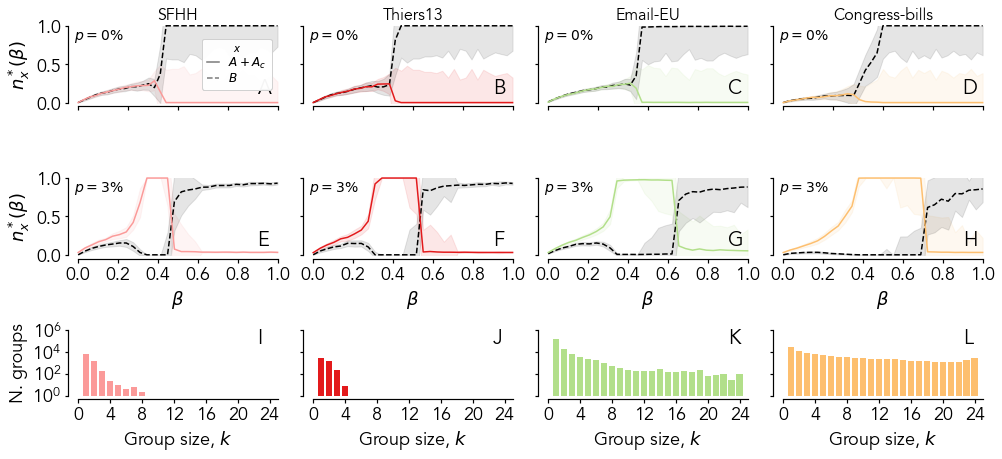

In [39]:
n_runs = 50
rule = 'intersection'
datasetlist = ['SFHH','Thiers13','Email-EU','congress-bills']
datasetstrings = ['SFHH','Thiers13','Email-EU','Congress-bills']
colors = [ListedColormap(pltt.colorbrewer.qualitative.Paired_7.mpl_colors)(i) for i in range(0,7)]
sorted_colors = [colors[i] for i in [4, 5, 2, 6]]

plt.figure(figsize=(14,6.5)) #figsize=(13,12)
gs = gridspec.GridSpec(nrows=3, ncols=4, height_ratios=[1,1,0.85], width_ratios=[1,1,1,1]) 

######################################################################
p = 0
axlabels = ['A','B','C','D']
axindexes = [0,1,2,3]
######################################################################
for ii, dataset in enumerate(datasetlist):
    
    ax = plt.subplot(gs[axindexes[ii]]) 
    
    tensor = []
    for run_id in range(n_runs):
        if dataset in ['Email-EU','congress-bills']:
            fname = '../Results/Simulations/HONG_2words_%s/%s/fixed_p%.2f_varbeta_run%i/summary.csv'%(dataset, rule, p, run_id)
        else:
            fname = '../Results/Simulations/HONG_2words_Sociopatterns/%s/%s/fixed_p%.2f_varbeta_run%i/summary.csv'%(dataset, rule, p, run_id)
        df = pd.read_csv(fname)
        tensor.append(df.to_numpy())
    #Taking the average from simulations and plotting it
    tensor = np.array(tensor)
    med_tensor = np.median(tensor, axis=0)
    std_tensor = np.std(tensor, axis=0)
    med_df = pd.DataFrame(med_tensor, index=None,
                            columns=['beta','avg_n_A+p','std_n_A+p','avg_n_B','std_n_B','avg_n_AB','std_n_AB'])
    std_df = pd.DataFrame(std_tensor, index=None,
                          columns=['beta','avg_n_A+p','std_n_A+p','avg_n_B','std_n_B','avg_n_AB','std_n_AB'])
    ax.plot(med_df['beta'], med_df['avg_n_A+p'], '-', mfc='None', color=sorted_colors[ii], mec=sorted_colors[ii], zorder=2, mew=1.5, clip_on=False)
    ax.plot(med_df['beta'], med_df['avg_n_B'], '--', ms=8, mfc='None', color='black', mec='black', zorder=1, mew=1.2, clip_on=False)
    ax.fill_between(med_df['beta'], med_df['avg_n_A+p']-std_df['avg_n_A+p'], med_df['avg_n_A+p']+std_df['avg_n_A+p'], color=sorted_colors[ii], alpha=0.1, zorder=0)
    ax.fill_between(med_df['beta'], med_df['avg_n_B']-std_df['avg_n_B'], med_df['avg_n_B']+std_df['avg_n_B'], color='black', alpha=0.1, zorder=0)
    
    ax.set_xlim(0, 0.8)
    ax.set_xticks([0,0.2,0.4,0.6,0.8])
    ax.set_xticklabels([])
    if ii==0:
        ax.set_ylabel(r'$n_x^*(\beta)$', size=18)
    else:
        ax.set_yticklabels([])
    ax.set_ylim(0,1)
    ax.tick_params(axis='both', which='major', labelsize=18)
    ax.set_yticks([0,0.5,1])
    
    ax.annotate(axlabels[ii], xy=(0.9, 0.12), xycoords="axes fraction", fontsize=20, fontweight="bold")
    ax.set_title(datasetstrings[ii], fontsize=16)
    ax.annotate(r'$p=0\%$', xy=(-0.02, 0.82), xycoords="axes fraction", fontsize=14)
    
######################################################################
p = 0.03
axlabels = ['E','F','G','H']
axindexes = [4,5,6,7]
######################################################################
for ii, dataset in enumerate(datasetlist):
    
    ax = plt.subplot(gs[axindexes[ii]]) 
    
    tensor = []
    for run_id in range(n_runs):
        if dataset in ['Email-EU','congress-bills']:
            fname = '../Results/Simulations/HONG_2words_%s/%s/fixed_p%.2f_varbeta_run%i/summary.csv'%(dataset, rule, p, run_id)
        else:
            fname = '../Results/Simulations/HONG_2words_Sociopatterns/%s/%s/fixed_p%.2f_varbeta_run%i/summary.csv'%(dataset, rule, p, run_id)
        df = pd.read_csv(fname)
        tensor.append(df.to_numpy())
    #Taking the average from simulations and plotting it
    tensor = np.array(tensor)
    med_tensor = np.median(tensor, axis=0)
    std_tensor = np.std(tensor, axis=0)
    med_df = pd.DataFrame(med_tensor, index=None,
                            columns=['beta','avg_n_A+p','std_n_A+p','avg_n_B','std_n_B','avg_n_AB','std_n_AB'])
    std_df = pd.DataFrame(std_tensor, index=None,
                          columns=['beta','avg_n_A+p','std_n_A+p','avg_n_B','std_n_B','avg_n_AB','std_n_AB'])
    ax.plot(med_df['beta'], med_df['avg_n_A+p'], '-', mfc='None', color=sorted_colors[ii], mec=sorted_colors[ii], zorder=2, mew=1.5, clip_on=False)
    ax.plot(med_df['beta'], med_df['avg_n_B'], '--', ms=8, mfc='None', color='black', mec='black', zorder=1, mew=1.2, clip_on=False)
    ax.fill_between(med_df['beta'], med_df['avg_n_A+p']-std_df['avg_n_A+p'], med_df['avg_n_A+p']+std_df['avg_n_A+p'], color=sorted_colors[ii], alpha=0.1, zorder=0)
    ax.fill_between(med_df['beta'], med_df['avg_n_B']-std_df['avg_n_B'], med_df['avg_n_B']+std_df['avg_n_B'], color='black', alpha=0.1, zorder=0)

    ax.set_xlim(0, 1)
    ax.set_xlabel(r'$\beta$', size=18)
    if ii==0:
        ax.set_ylabel(r'$n_x^*(\beta)$', size=18)
    else:
        ax.set_yticklabels([])
    ax.set_ylim(0,1)
    ax.tick_params(axis='both', which='major', labelsize=18)
    ax.set_xticks([0,0.2,0.4,0.6,0.8,1])
    ax.set_yticks([0,0.5,1])
    
    ax.annotate(axlabels[ii], xy=(0.9, 0.12), xycoords="axes fraction", fontsize=20, fontweight="bold")
    ax.annotate(r'$p=3\%$', xy=(-0.02, 0.82), xycoords="axes fraction", fontsize=14)

    
##############################################################################
##############################################################################
dataset_dir = '../Data/Sociopatterns/Processed_data/'
n_minutes = 15
thr = 1
axindexes = [8,9,10,11]
axlabels = ['I','J','K','L']
##############################################################################
for ii, dataset in enumerate(datasetlist):
    
    ax = plt.subplot(gs[axindexes[ii]]) 
    
    if dataset in ['Email-EU','congress-bills']:
        filename = '../Data/%s/Processed_data/%s_simplices.json'%(dataset, dataset)
    else:
        filename = dataset_dir+'aggr_'+str(n_minutes)+'min_cliques_thr'+str(thr)+'_'+dataset+'.json'
    cliques_list = json.load(open(filename,'r'))
    size_counter = collections.Counter([len(simplex) for simplex in cliques_list])
    #shifting the keys -1 so that it matches the '1-hyperlink = group of 2' notation
    k_dict = {k-1: v for k, v in size_counter.items()}
    
    ax.bar(k_dict.keys(), k_dict.values(), color=sorted_colors[ii])

    ax.tick_params(axis='both', which='major', labelsize=18)
    ax.set_xlabel(r'Group size, $k$', size=18)
    ax.set_yscale('log')
    ax.set_ylim(1e0,1e6)
    ax.set_yticks([1e0,1e2,1e4,1e6])
    if ii==0:
        ax.set_ylabel(r'N. groups', size=18)
    else:
        ax.set_yticklabels([])
    ax.set_xlim(0,25)
    ax.set_xticks([0,4,8,12,16,20,24])
    
    ax.annotate(axlabels[ii], xy=(0.9, 0.8), xycoords="axes fraction", fontsize=20, fontweight="bold")


##############################################################################
##############################################################################

for ii in range(len(datasetlist)*3):
    ax = plt.subplot(gs[ii]) 
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.spines['bottom'].set_position(('axes', -0.05))
    ax.yaxis.set_ticks_position('left')
    ax.spines['left'].set_position(('axes', -0.05))
    
    
###### LEGEND ######
ax = plt.subplot(gs[0]) 
handles = [Line2D([0], [0], linestyle='-',  color='gray'),
Line2D([0], [0], linestyle='--', color='gray')]
labels = [r'$A+A_c$', r'$B$']
lg2 = ax.legend(handles, labels, loc='center right', title='$x$', fontsize='large',
                frameon=True, labelspacing=0.1, handlelength=1)
ax.add_artist(lg2)
    
plt.tight_layout()

filename = "../Figures/NG_nx_vs_beta_int_sim_empdata_4datasets.pdf"
plt.savefig(filename, bbox_inches='tight', dpi=150)

## SI Figure

Intersection rule for three value of $p$

<ipython-input-2-25b921af7c25>:189: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(gs[ii])
<ipython-input-2-25b921af7c25>:199: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(gs[0])


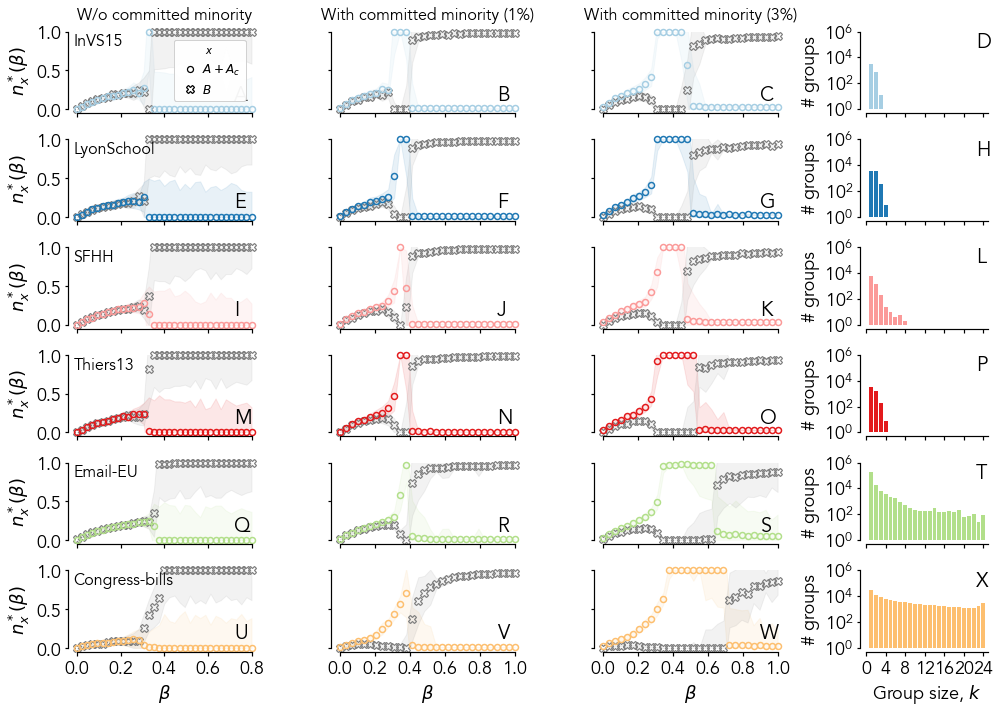

In [2]:
n_runs = 50
rule = 'intersection'
datasetlist = ['InVS15','LyonSchool','SFHH','Thiers13','Email-EU','congress-bills']
datasetstrings = ['InVS15','LyonSchool','SFHH','Thiers13','Email-EU','Congress-bills']
colors = [ListedColormap(pltt.colorbrewer.qualitative.Paired_7.mpl_colors)(i) for i in range(0,7)]
sorted_colors = [colors[i] for i in [0, 1, 4, 5, 2, 6]]

plt.figure(figsize=(14,10)) #figsize=(13,12)
gs = gridspec.GridSpec(nrows=len(datasetlist), ncols=4, height_ratios=[1]*len(datasetlist), width_ratios=[1,1,1,0.7]) 

######################################################################
p = 0
axlabels = ['A','E','I','M','Q','U']
axindexes = [0,4,8,12,16,20]
######################################################################
for ii, dataset in enumerate(datasetlist):
    
    ax = plt.subplot(gs[axindexes[ii]]) 
    
    tensor = []
    for run_id in range(n_runs):
        if dataset in ['Email-EU','congress-bills']:
            fname = '../Results/Simulations/HONG_2words_%s/%s/fixed_p%.2f_varbeta_run%i/summary.csv'%(dataset, rule, p, run_id)
        else:
            fname = '../Results/Simulations/HONG_2words_Sociopatterns/%s/%s/fixed_p%.2f_varbeta_run%i/summary.csv'%(dataset, rule, p, run_id)
        df = pd.read_csv(fname)
        tensor.append(df.to_numpy())
    #Taking the average from simulations and plotting it
    tensor = np.array(tensor)
    med_tensor = np.median(tensor, axis=0)
    std_tensor = np.std(tensor, axis=0)
    med_df = pd.DataFrame(med_tensor, index=None,
                            columns=['beta','avg_n_A+p','std_n_A+p','avg_n_B','std_n_B','avg_n_AB','std_n_AB'])
    std_df = pd.DataFrame(std_tensor, index=None,
                          columns=['beta','avg_n_A+p','std_n_A+p','avg_n_B','std_n_B','avg_n_AB','std_n_AB'])
    ax.plot(med_df['beta'], med_df['avg_n_A+p'], 'o', mfc='None', color=sorted_colors[ii], mec=sorted_colors[ii], zorder=2, mew=1.5, clip_on=False)
    ax.plot(med_df['beta'], med_df['avg_n_B'], 'X', ms=8, mfc='None', color='gray', mec='gray', zorder=1, mew=1.2, clip_on=False)
    ax.fill_between(med_df['beta'], med_df['avg_n_A+p']-std_df['avg_n_A+p'], med_df['avg_n_A+p']+std_df['avg_n_A+p'], color=sorted_colors[ii], alpha=0.1, zorder=0)
    ax.fill_between(med_df['beta'], med_df['avg_n_B']-std_df['avg_n_B'], med_df['avg_n_B']+std_df['avg_n_B'], color='gray', alpha=0.1, zorder=0)
    
    ax.set_xlim(0, 0.8)
    ax.set_xticks([0,0.2,0.4,0.6,0.8])
    if ii==5:
        ax.set_xlabel(r'$\beta$', size=18)
    else:
        ax.set_xticklabels([])
    ax.set_ylabel(r'$n_x^*(\beta)$', size=18)
    ax.set_ylim(0,1)
    ax.tick_params(axis='both', which='major', labelsize=18)
    if ii==0: ax.set_title('W/o committed minority', size=16, y=1.08)  
    #ax.set_yticks([0,0.2,0.4,0.6,0.8,1])
    
    ax.annotate(axlabels[ii], xy=(0.9, 0.12), xycoords="axes fraction", fontsize=20, fontweight="bold")
    ax.annotate(datasetstrings[ii], xy=(-0.02, 0.82), xycoords="axes fraction", fontsize=16)
    
######################################################################
p = 0.01
axlabels = ['B','F','J','N','R','V']
axindexes = [1,5,9,13,17,21]
######################################################################
for ii, dataset in enumerate(datasetlist):
    
    ax = plt.subplot(gs[axindexes[ii]]) 
    
    tensor = []
    for run_id in range(n_runs):
        if dataset in ['Email-EU','congress-bills']:
            fname = '../Results/Simulations/HONG_2words_%s/%s/fixed_p%.2f_varbeta_run%i/summary.csv'%(dataset, rule, p, run_id)
        else:
            fname = '../Results/Simulations/HONG_2words_Sociopatterns/%s/%s/fixed_p%.2f_varbeta_run%i/summary.csv'%(dataset, rule, p, run_id)
        df = pd.read_csv(fname)
        tensor.append(df.to_numpy())
    #Taking the average from simulations and plotting it
    tensor = np.array(tensor)
    med_tensor = np.median(tensor, axis=0)
    std_tensor = np.std(tensor, axis=0)
    med_df = pd.DataFrame(med_tensor, index=None,
                            columns=['beta','avg_n_A+p','std_n_A+p','avg_n_B','std_n_B','avg_n_AB','std_n_AB'])
    std_df = pd.DataFrame(std_tensor, index=None,
                          columns=['beta','avg_n_A+p','std_n_A+p','avg_n_B','std_n_B','avg_n_AB','std_n_AB'])
    ax.plot(med_df['beta'], med_df['avg_n_A+p'], 'o', mfc='None', color=sorted_colors[ii], mec=sorted_colors[ii], zorder=2, mew=1.5, clip_on=False)
    ax.plot(med_df['beta'], med_df['avg_n_B'], 'X', ms=8, mfc='None', color='gray', mec='gray', zorder=1, mew=1.2, clip_on=False)
    ax.fill_between(med_df['beta'], med_df['avg_n_A+p']-std_df['avg_n_A+p'], med_df['avg_n_A+p']+std_df['avg_n_A+p'], color=sorted_colors[ii], alpha=0.1, zorder=0)
    ax.fill_between(med_df['beta'], med_df['avg_n_B']-std_df['avg_n_B'], med_df['avg_n_B']+std_df['avg_n_B'], color='gray', alpha=0.1, zorder=0)

    ax.set_xlim(0, 1)
    if ii==5:
        ax.set_xlabel(r'$\beta$', size=18)
    else:
        ax.set_xticklabels([])
    ax.set_ylim(0,1)
    ax.set_yticklabels([])
    ax.tick_params(axis='both', which='major', labelsize=18)
    if ii==0: ax.set_title(r'With committed minority (1%)', size=16, y=1.08)  
    ax.set_xticks([0,0.2,0.4,0.6,0.8,1])
    #ax.set_yticks([0,0.2,0.4,0.6,0.8,1])
    ax.set_yticklabels([])
    
    ax.annotate(axlabels[ii], xy=(0.9, 0.12), xycoords="axes fraction", fontsize=20, fontweight="bold")

    
##############################################################################
p = 0.03
axlabels = ['C','G','K','O','S','W']
axindexes = [2,6,10,14,18,22]
######################################################################
for ii, dataset in enumerate(datasetlist):
    
    ax = plt.subplot(gs[axindexes[ii]]) 
    
    tensor = []
    for run_id in range(n_runs):
        if dataset in ['Email-EU','congress-bills']:
            fname = '../Results/Simulations/HONG_2words_%s/%s/fixed_p%.2f_varbeta_run%i/summary.csv'%(dataset, rule, p, run_id)
        else:
            fname = '../Results/Simulations/HONG_2words_Sociopatterns/%s/%s/fixed_p%.2f_varbeta_run%i/summary.csv'%(dataset, rule, p, run_id)
        df = pd.read_csv(fname)
        tensor.append(df.to_numpy())
    #Taking the average from simulations and plotting it
    tensor = np.array(tensor)
    med_tensor = np.median(tensor, axis=0)
    std_tensor = np.std(tensor, axis=0)
    med_df = pd.DataFrame(med_tensor, index=None,
                            columns=['beta','avg_n_A+p','std_n_A+p','avg_n_B','std_n_B','avg_n_AB','std_n_AB'])
    std_df = pd.DataFrame(std_tensor, index=None,
                          columns=['beta','avg_n_A+p','std_n_A+p','avg_n_B','std_n_B','avg_n_AB','std_n_AB'])
    ax.plot(med_df['beta'], med_df['avg_n_A+p'], 'o', mfc='None', color=sorted_colors[ii], mec=sorted_colors[ii], zorder=2, mew=1.5, clip_on=False)
    ax.plot(med_df['beta'], med_df['avg_n_B'], 'X', ms=8, mfc='None', color='gray', mec='gray', zorder=1, mew=1.2, clip_on=False)
    ax.fill_between(med_df['beta'], med_df['avg_n_A+p']-std_df['avg_n_A+p'], med_df['avg_n_A+p']+std_df['avg_n_A+p'], color=sorted_colors[ii], alpha=0.1, zorder=0)
    ax.fill_between(med_df['beta'], med_df['avg_n_B']-std_df['avg_n_B'], med_df['avg_n_B']+std_df['avg_n_B'], color='gray', alpha=0.1, zorder=0)

    ax.set_xlim(0, 1)
    if ii==5:
        ax.set_xlabel(r'$\beta$', size=18)
    else:
        ax.set_xticklabels([])
    ax.set_ylim(0,1)
    ax.set_yticklabels([])
    ax.tick_params(axis='both', which='major', labelsize=18)
    if ii==0: ax.set_title(r'With committed minority (3%)', size=16, y=1.08)  
    ax.set_xticks([0,0.2,0.4,0.6,0.8,1])
    #ax.set_yticks([0,0.2,0.4,0.6,0.8,1])
    ax.set_yticklabels([])
    
    ax.annotate(axlabels[ii], xy=(0.9, 0.12), xycoords="axes fraction", fontsize=20, fontweight="bold", zorder=8)


##############################################################################
##############################################################################
dataset_dir = '../Data/Sociopatterns/Processed_data/'
n_minutes = 15
thr = 1
axindexes = [3,7,11,15,19,23]
axlabels = ['D','H','L','P','T','X']
##############################################################################
for ii, dataset in enumerate(datasetlist):
    
    ax = plt.subplot(gs[axindexes[ii]]) 
    
    if dataset in ['Email-EU','congress-bills']:
        filename = '../Data/%s/Processed_data/%s_simplices.json'%(dataset, dataset)
    else:
        filename = dataset_dir+'aggr_'+str(n_minutes)+'min_cliques_thr'+str(thr)+'_'+dataset+'.json'
    cliques_list = json.load(open(filename,'r'))
    size_counter = collections.Counter([len(simplex) for simplex in cliques_list])
    #shifting the keys -1 so that it matches the '1-hyperlink = group of 2' notation
    k_dict = {k-1: v for k, v in size_counter.items()}
    
    ax.bar(k_dict.keys(), k_dict.values(), color=sorted_colors[ii])

    ax.tick_params(axis='both', which='major', labelsize=18)
    if ii==5:
        ax.set_xlabel(r'Group size, $k$', size=18)
    else:
        ax.set_xticklabels([])
    ax.set_ylabel(r'# groups', size=18)
    ax.set_xlim(0,25)
    ax.set_xticks([0,4,8,12,16,20,24])
    ax.set_yscale('log')
    ax.set_ylim(1e0,1e6)
    ax.set_yticks([1e0,1e2,1e4,1e6])
    
    ax.annotate(axlabels[ii], xy=(0.9, 0.8), xycoords="axes fraction", fontsize=20, fontweight="bold")

##############################################################################
##############################################################################

for ii in range(6*4):
    ax = plt.subplot(gs[ii]) 
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.spines['bottom'].set_position(('axes', -0.05))
    ax.yaxis.set_ticks_position('left')
    ax.spines['left'].set_position(('axes', -0.05))
    
    
###### LEGEND ######
ax = plt.subplot(gs[0]) 
handles = [Line2D([0], [0], marker='o', linestyle='', mfc='white', color='black', mec='black', mew=1.2),
Line2D([0], [0], marker='X', ms=8, linestyle='', mfc='white', color='black', mec='black', mew=1.2)]
labels = [r'$A+A_c$', r'$B$']
lg2 = ax.legend(handles, labels, loc='center right', title='$x$', fontsize='large', frameon=True, handletextpad=0)
ax.add_artist(lg2)
    
plt.tight_layout()

filename = "../Figures/NG_nx_vs_beta_intersection_sim_empdata_SI.pdf"
plt.savefig(filename, bbox_inches='tight', dpi=150)

Union rule for three values of $p$

<ipython-input-3-f922c6d72878>:189: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(gs[ii])
<ipython-input-3-f922c6d72878>:199: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(gs[0])


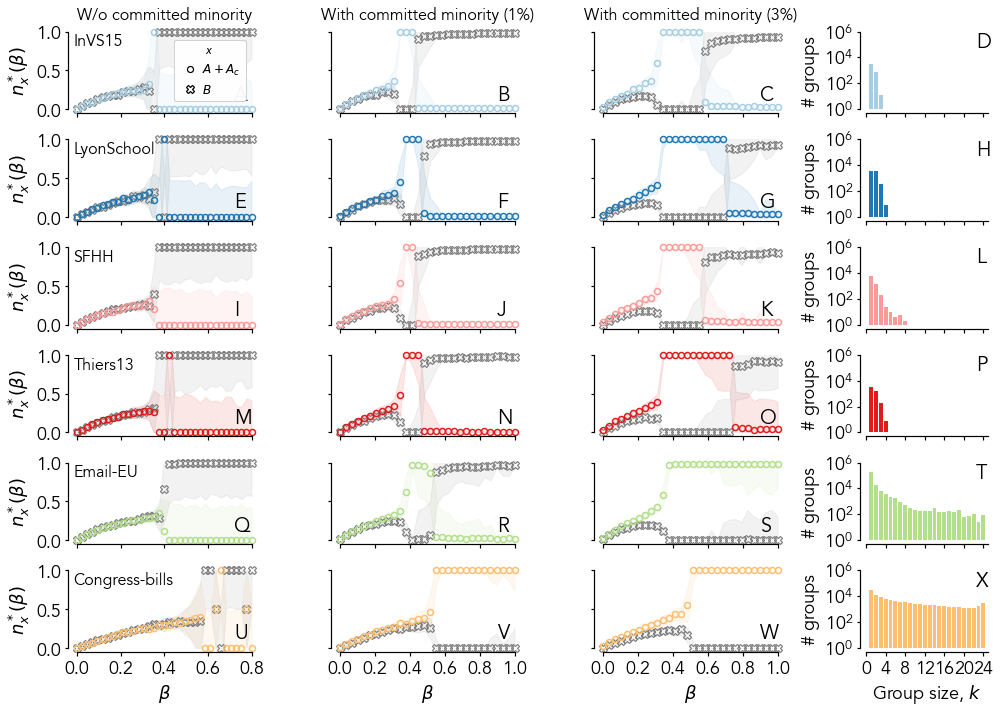

In [3]:
n_runs = 50
rule = 'union'
datasetlist = ['InVS15','LyonSchool','SFHH','Thiers13','Email-EU','congress-bills']
datasetstrings = ['InVS15','LyonSchool','SFHH','Thiers13','Email-EU','Congress-bills']
colors = [ListedColormap(pltt.colorbrewer.qualitative.Paired_7.mpl_colors)(i) for i in range(0,7)]
sorted_colors = [colors[i] for i in [0, 1, 4, 5, 2, 6]]

plt.figure(figsize=(14,10)) #figsize=(13,12)
gs = gridspec.GridSpec(nrows=len(datasetlist), ncols=4, height_ratios=[1]*len(datasetlist), width_ratios=[1,1,1,0.7]) 

######################################################################
p = 0
axlabels = ['A','E','I','M','Q','U']
axindexes = [0,4,8,12,16,20]
######################################################################
for ii, dataset in enumerate(datasetlist):
    
    ax = plt.subplot(gs[axindexes[ii]]) 
    
    tensor = []
    for run_id in range(n_runs):
        if dataset in ['Email-EU','congress-bills']:
            fname = '../Results/Simulations/HONG_2words_%s/%s/fixed_p%.2f_varbeta_run%i/summary.csv'%(dataset, rule, p, run_id)
        else:
            fname = '../Results/Simulations/HONG_2words_Sociopatterns/%s/%s/fixed_p%.2f_varbeta_run%i/summary.csv'%(dataset, rule, p, run_id)
        df = pd.read_csv(fname)
        tensor.append(df.to_numpy())
    #Taking the average from simulations and plotting it
    tensor = np.array(tensor)
    med_tensor = np.median(tensor, axis=0)
    std_tensor = np.std(tensor, axis=0)
    med_df = pd.DataFrame(med_tensor, index=None,
                            columns=['beta','avg_n_A+p','std_n_A+p','avg_n_B','std_n_B','avg_n_AB','std_n_AB'])
    std_df = pd.DataFrame(std_tensor, index=None,
                          columns=['beta','avg_n_A+p','std_n_A+p','avg_n_B','std_n_B','avg_n_AB','std_n_AB'])
    ax.plot(med_df['beta'], med_df['avg_n_A+p'], 'o', mfc='None', color=sorted_colors[ii], mec=sorted_colors[ii], zorder=2, mew=1.5, clip_on=False)
    ax.plot(med_df['beta'], med_df['avg_n_B'], 'X', ms=8, mfc='None', color='gray', mec='gray', zorder=1, mew=1.2, clip_on=False)
    ax.fill_between(med_df['beta'], med_df['avg_n_A+p']-std_df['avg_n_A+p'], med_df['avg_n_A+p']+std_df['avg_n_A+p'], color=sorted_colors[ii], alpha=0.1, zorder=0)
    ax.fill_between(med_df['beta'], med_df['avg_n_B']-std_df['avg_n_B'], med_df['avg_n_B']+std_df['avg_n_B'], color='gray', alpha=0.1, zorder=0)
    
    ax.set_xlim(0, 0.8)
    ax.set_xticks([0,0.2,0.4,0.6,0.8])
    if ii==5:
        ax.set_xlabel(r'$\beta$', size=18)
    else:
        ax.set_xticklabels([])
    ax.set_ylabel(r'$n_x^*(\beta)$', size=18)
    ax.set_ylim(0,1)
    ax.tick_params(axis='both', which='major', labelsize=18)
    if ii==0: ax.set_title('W/o committed minority', size=16, y=1.08)  
    #ax.set_yticks([0,0.2,0.4,0.6,0.8,1])
    
    ax.annotate(axlabels[ii], xy=(0.9, 0.12), xycoords="axes fraction", fontsize=20, fontweight="bold")
    ax.annotate(datasetstrings[ii], xy=(-0.02, 0.82), xycoords="axes fraction", fontsize=16)
    
######################################################################
p = 0.01
axlabels = ['B','F','J','N','R','V']
axindexes = [1,5,9,13,17,21]
######################################################################
for ii, dataset in enumerate(datasetlist):
    
    ax = plt.subplot(gs[axindexes[ii]]) 
    
    tensor = []
    for run_id in range(n_runs):
        if dataset in ['Email-EU','congress-bills']:
            fname = '../Results/Simulations/HONG_2words_%s/%s/fixed_p%.2f_varbeta_run%i/summary.csv'%(dataset, rule, p, run_id)
        else:
            fname = '../Results/Simulations/HONG_2words_Sociopatterns/%s/%s/fixed_p%.2f_varbeta_run%i/summary.csv'%(dataset, rule, p, run_id)
        df = pd.read_csv(fname)
        tensor.append(df.to_numpy())
    #Taking the average from simulations and plotting it
    tensor = np.array(tensor)
    med_tensor = np.median(tensor, axis=0)
    std_tensor = np.std(tensor, axis=0)
    med_df = pd.DataFrame(med_tensor, index=None,
                            columns=['beta','avg_n_A+p','std_n_A+p','avg_n_B','std_n_B','avg_n_AB','std_n_AB'])
    std_df = pd.DataFrame(std_tensor, index=None,
                          columns=['beta','avg_n_A+p','std_n_A+p','avg_n_B','std_n_B','avg_n_AB','std_n_AB'])
    ax.plot(med_df['beta'], med_df['avg_n_A+p'], 'o', mfc='None', color=sorted_colors[ii], mec=sorted_colors[ii], zorder=2, mew=1.5, clip_on=False)
    ax.plot(med_df['beta'], med_df['avg_n_B'], 'X', ms=8, mfc='None', color='gray', mec='gray', zorder=1, mew=1.2, clip_on=False)
    ax.fill_between(med_df['beta'], med_df['avg_n_A+p']-std_df['avg_n_A+p'], med_df['avg_n_A+p']+std_df['avg_n_A+p'], color=sorted_colors[ii], alpha=0.1, zorder=0)
    ax.fill_between(med_df['beta'], med_df['avg_n_B']-std_df['avg_n_B'], med_df['avg_n_B']+std_df['avg_n_B'], color='gray', alpha=0.1, zorder=0)

    ax.set_xlim(0, 1)
    if ii==5:
        ax.set_xlabel(r'$\beta$', size=18)
    else:
        ax.set_xticklabels([])
    ax.set_ylim(0,1)
    ax.set_yticklabels([])
    ax.tick_params(axis='both', which='major', labelsize=18)
    if ii==0: ax.set_title(r'With committed minority (1%)', size=16, y=1.08)  
    ax.set_xticks([0,0.2,0.4,0.6,0.8,1])
    #ax.set_yticks([0,0.2,0.4,0.6,0.8,1])
    ax.set_yticklabels([])
    
    ax.annotate(axlabels[ii], xy=(0.9, 0.12), xycoords="axes fraction", fontsize=20, fontweight="bold")

    
##############################################################################
p = 0.03
axlabels = ['C','G','K','O','S','W']
axindexes = [2,6,10,14,18,22]
######################################################################
for ii, dataset in enumerate(datasetlist):
    
    ax = plt.subplot(gs[axindexes[ii]]) 
    
    tensor = []
    for run_id in range(n_runs):
        if dataset in ['Email-EU','congress-bills']:
            fname = '../Results/Simulations/HONG_2words_%s/%s/fixed_p%.2f_varbeta_run%i/summary.csv'%(dataset, rule, p, run_id)
        else:
            fname = '../Results/Simulations/HONG_2words_Sociopatterns/%s/%s/fixed_p%.2f_varbeta_run%i/summary.csv'%(dataset, rule, p, run_id)
        df = pd.read_csv(fname)
        tensor.append(df.to_numpy())
    #Taking the average from simulations and plotting it
    tensor = np.array(tensor)
    med_tensor = np.median(tensor, axis=0)
    std_tensor = np.std(tensor, axis=0)
    med_df = pd.DataFrame(med_tensor, index=None,
                            columns=['beta','avg_n_A+p','std_n_A+p','avg_n_B','std_n_B','avg_n_AB','std_n_AB'])
    std_df = pd.DataFrame(std_tensor, index=None,
                          columns=['beta','avg_n_A+p','std_n_A+p','avg_n_B','std_n_B','avg_n_AB','std_n_AB'])
    ax.plot(med_df['beta'], med_df['avg_n_A+p'], 'o', mfc='None', color=sorted_colors[ii], mec=sorted_colors[ii], zorder=2, mew=1.5, clip_on=False)
    ax.plot(med_df['beta'], med_df['avg_n_B'], 'X', ms=8, mfc='None', color='gray', mec='gray', zorder=1, mew=1.2, clip_on=False)
    ax.fill_between(med_df['beta'], med_df['avg_n_A+p']-std_df['avg_n_A+p'], med_df['avg_n_A+p']+std_df['avg_n_A+p'], color=sorted_colors[ii], alpha=0.1, zorder=0)
    ax.fill_between(med_df['beta'], med_df['avg_n_B']-std_df['avg_n_B'], med_df['avg_n_B']+std_df['avg_n_B'], color='gray', alpha=0.1, zorder=0)

    ax.set_xlim(0, 1)
    if ii==5:
        ax.set_xlabel(r'$\beta$', size=18)
    else:
        ax.set_xticklabels([])
    ax.set_ylim(0,1)
    ax.set_yticklabels([])
    ax.tick_params(axis='both', which='major', labelsize=18)
    if ii==0: ax.set_title(r'With committed minority (3%)', size=16, y=1.08)  
    ax.set_xticks([0,0.2,0.4,0.6,0.8,1])
    #ax.set_yticks([0,0.2,0.4,0.6,0.8,1])
    ax.set_yticklabels([])
    
    ax.annotate(axlabels[ii], xy=(0.9, 0.12), xycoords="axes fraction", fontsize=20, fontweight="bold", zorder=8)


##############################################################################
##############################################################################
dataset_dir = '../Data/Sociopatterns/Processed_data/'
n_minutes = 15
thr = 1
axindexes = [3,7,11,15,19,23]
axlabels = ['D','H','L','P','T','X']
##############################################################################
for ii, dataset in enumerate(datasetlist):
    
    ax = plt.subplot(gs[axindexes[ii]]) 
    
    if dataset in ['Email-EU','congress-bills']:
        filename = '../Data/%s/Processed_data/%s_simplices.json'%(dataset, dataset)
    else:
        filename = dataset_dir+'aggr_'+str(n_minutes)+'min_cliques_thr'+str(thr)+'_'+dataset+'.json'
    cliques_list = json.load(open(filename,'r'))
    size_counter = collections.Counter([len(simplex) for simplex in cliques_list])
    #shifting the keys -1 so that it matches the '1-hyperlink = group of 2' notation
    k_dict = {k-1: v for k, v in size_counter.items()}
    
    ax.bar(k_dict.keys(), k_dict.values(), color=sorted_colors[ii])

    ax.tick_params(axis='both', which='major', labelsize=18)
    if ii==5:
        ax.set_xlabel(r'Group size, $k$', size=18)
    else:
        ax.set_xticklabels([])
    ax.set_ylabel(r'# groups', size=18)
    ax.set_xlim(0,25)
    ax.set_xticks([0,4,8,12,16,20,24])
    ax.set_yscale('log')
    ax.set_ylim(1e0,1e6)
    ax.set_yticks([1e0,1e2,1e4,1e6])
    
    ax.annotate(axlabels[ii], xy=(0.9, 0.8), xycoords="axes fraction", fontsize=20, fontweight="bold")

##############################################################################
##############################################################################

for ii in range(6*4):
    ax = plt.subplot(gs[ii]) 
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.spines['bottom'].set_position(('axes', -0.05))
    ax.yaxis.set_ticks_position('left')
    ax.spines['left'].set_position(('axes', -0.05))
    
    
###### LEGEND ######
ax = plt.subplot(gs[0]) 
handles = [Line2D([0], [0], marker='o', linestyle='', mfc='white', color='black', mec='black', mew=1.2),
Line2D([0], [0], marker='X', ms=8, linestyle='', mfc='white', color='black', mec='black', mew=1.2)]
labels = [r'$A+A_c$', r'$B$']
lg2 = ax.legend(handles, labels, loc='center right', title='$x$', fontsize='large', frameon=True, handletextpad=0)
ax.add_artist(lg2)
    
plt.tight_layout()

filename = "../Figures/NG_nx_vs_beta_union_sim_empdata_SI.pdf"
plt.savefig(filename, bbox_inches='tight', dpi=150)

## Temporal evolution

In [3]:
def stretch_list(some_list, target_len):
    some_list = list(some_list)
    #Stretching a list adding the last element at the end until it reaches the desired length
    return some_list[:target_len] + [some_list[-1]]*(target_len - len(some_list))

Complete figure for SI

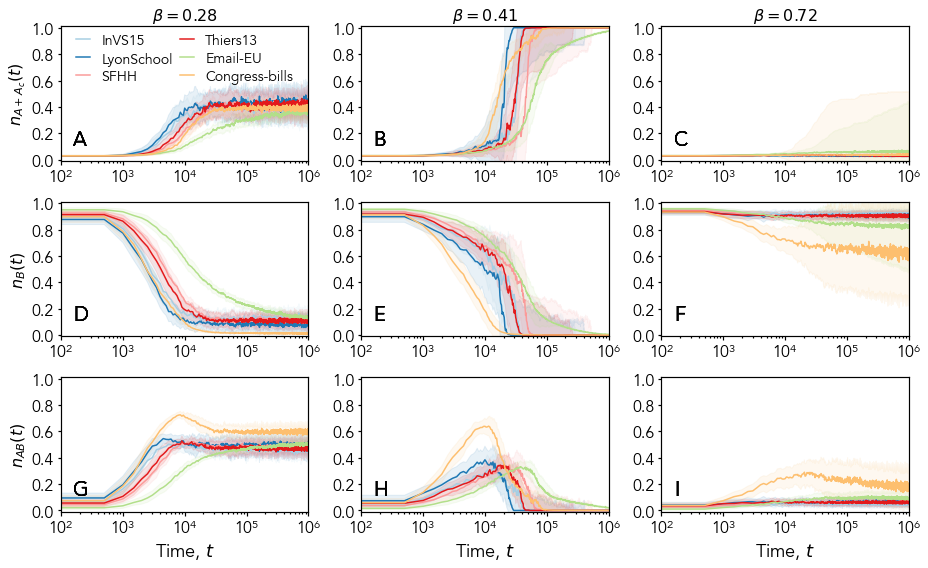

In [4]:
p=0.03
n_runs = 50
datasetlist = ['InVS15','LyonSchool','SFHH','Thiers13','Email-EU','congress-bills']
colors = [ListedColormap(pltt.colorbrewer.qualitative.Paired_7.mpl_colors)(i) for i in range(0,7)]
sorted_colors = [colors[i] for i in [0, 1, 4, 5, 2, 6]]
#axlabels = ['A','B','C','D','E','F','G','H','I','J','K','L']

time = np.arange(0, 1e6+500, 500)

######################################################################
rule = 'intersection'
######################################################################

fig, ax = plt.subplots(3,3, figsize=(13,8))

beta = 0.2759
axlabels = ['A','D','G']

for ii, dataset in enumerate(datasetlist):
    
    tensor_A, tensor_B, tensor_AB = [], [], []        
    for run_id in range(n_runs):
        if dataset in ['Email-EU','congress-bills']:
            fname = '../Results/Simulations/HONG_2words_%s/%s/fixed_p%.2f_varbeta_run%i/HONG_densities_beta%.4f_p%.2f.csv'%(dataset, rule, p, run_id, beta, p)
        else:
            fname = '../Results/Simulations/HONG_2words_Sociopatterns/%s/%s/fixed_p%.2f_varbeta_run%i/HONG_densities_beta%.4f_p%.2f.csv'%(dataset, rule, p, run_id, beta, p)
        df = pd.read_csv(fname)

        #adding values after absorbing state
        if len(df)<2001:
            tensor_A.append(stretch_list(df['n_A+p'].values, 2001))
            tensor_B.append(stretch_list(df['n_B'].values, 2001))
            tensor_AB.append(stretch_list(df['n_AB'].values, 2001))
        else:
            tensor_A.append(df['n_A+p'].values)
            tensor_B.append(df['n_B'].values)
            tensor_AB.append(df['n_AB'].values)

    tensor_A = np.array(tensor_A)
    tensor_B = np.array(tensor_B)
    tensor_AB = np.array(tensor_AB)
    med_tensor_A = np.median(tensor_A, axis=0)
    med_tensor_B = np.median(tensor_B, axis=0)
    med_tensor_AB = np.median(tensor_AB, axis=0)
    std_tensor_A = np.std(tensor_A, axis=0)
    std_tensor_B = np.std(tensor_B, axis=0)
    std_tensor_AB = np.std(tensor_AB, axis=0)
    
    if dataset=='congress-bills': dataset_str = dataset.capitalize()
    else: dataset_str = dataset

    ax[0][0].plot(time, med_tensor_A, color=sorted_colors[ii], label=dataset_str)
    ax[0][0].fill_between(time, med_tensor_A-std_tensor_A, med_tensor_A+std_tensor_A, color=sorted_colors[ii], alpha=0.1, zorder=0)
    ax[1][0].plot(time, med_tensor_B, color=sorted_colors[ii], label=dataset_str)
    ax[1][0].fill_between(time, med_tensor_B-std_tensor_B, med_tensor_B+std_tensor_B, color=sorted_colors[ii], alpha=0.1, zorder=0)
    ax[2][0].plot(time, med_tensor_AB, color=sorted_colors[ii], label=dataset_str)
    ax[2][0].fill_between(time, med_tensor_AB-std_tensor_AB, med_tensor_AB+std_tensor_AB, color=sorted_colors[ii], alpha=0.1, zorder=0)

    ax[2][0].set_xlabel(r'Time, $t$', size=18)
    ax[0][0].set_ylabel(r'$n_{A+A_c}(t)$', size=16)  
    ax[1][0].set_ylabel(r'$n_{B}(t)$', size=16)  
    ax[2][0].set_ylabel(r'$n_{AB}(t)$', size=16)  
    
    for ii in [0,1,2]:
        ax[ii][0].set_xscale('log')
        ax[ii][0].set_xlim(1e2, 1e6)
        ax[ii][0].set_yticks([0,0.2,0.4,0.6,0.8,1])
        #ax[ii][0].set_xlim(0, 1e6)
        ax[ii][0].set_ylim(-0.01, 1.01)
        ax[ii][0].tick_params(axis='both', which='major', labelsize=16)
        ax[ii][0].annotate(axlabels[ii], xy=(0.05, 0.12), xycoords="axes fraction", fontsize=20, fontweight="bold")
    
    ax[0][0].legend(fontsize=14, ncol=2, handlelength=1, frameon=False,
                    loc='upper center', labelspacing=0.2, borderpad=0, columnspacing=0.5)
    ax[0][0].set_title(r'$\beta=%.2f$'%beta, size=16)

beta = 0.4138
axlabels = ['B','E','H']

for ii, dataset in enumerate(datasetlist):
    
    tensor_A, tensor_B, tensor_AB = [], [], []        
    for run_id in range(n_runs):
        if dataset in ['Email-EU','congress-bills']:
            fname = '../Results/Simulations/HONG_2words_%s/%s/fixed_p%.2f_varbeta_run%i/HONG_densities_beta%.4f_p%.2f.csv'%(dataset, rule, p, run_id, beta, p)
        else:
            fname = '../Results/Simulations/HONG_2words_Sociopatterns/%s/%s/fixed_p%.2f_varbeta_run%i/HONG_densities_beta%.4f_p%.2f.csv'%(dataset, rule, p, run_id, beta, p)
        df = pd.read_csv(fname)
        
        #adding values after absorbing state
        if len(df)<2000:
            tensor_A.append(stretch_list(df['n_A+p'].values, 2001))
            tensor_B.append(stretch_list(df['n_B'].values, 2001))
            tensor_AB.append(stretch_list(df['n_AB'].values, 2001))
        else:
            tensor_A.append(df['n_A+p'].values)
            tensor_B.append(df['n_B'].values)
            tensor_AB.append(df['n_AB'].values)
        
    tensor_A = np.array(tensor_A)
    tensor_B = np.array(tensor_B)
    tensor_AB = np.array(tensor_AB)
    med_tensor_A = np.median(tensor_A, axis=0)
    med_tensor_B = np.median(tensor_B, axis=0)
    med_tensor_AB = np.median(tensor_AB, axis=0)
    std_tensor_A = np.std(tensor_A, axis=0)
    std_tensor_B = np.std(tensor_B, axis=0)
    std_tensor_AB = np.std(tensor_AB, axis=0)
        
    ax[0][1].plot(time, med_tensor_A, color=sorted_colors[ii])
    ax[0][1].fill_between(time, med_tensor_A-std_tensor_A, med_tensor_A+std_tensor_A, color=sorted_colors[ii], alpha=0.1, zorder=0)
    ax[1][1].plot(time, med_tensor_B, color=sorted_colors[ii])
    ax[1][1].fill_between(time, med_tensor_B-std_tensor_B, med_tensor_B+std_tensor_B, color=sorted_colors[ii], alpha=0.1, zorder=0)
    ax[2][1].plot(time, med_tensor_AB, color=sorted_colors[ii])
    ax[2][1].fill_between(time, med_tensor_AB-std_tensor_AB, med_tensor_AB+std_tensor_AB, color=sorted_colors[ii], alpha=0.1, zorder=0)

    ax[2][1].set_xlabel(r'Time, $t$', size=18)
    
    for ii in [0,1,2]:
        ax[ii][1].set_xscale('log')
        ax[ii][1].set_xlim(1e2, 1e6)
        ax[ii][1].set_yticks([0,0.2,0.4,0.6,0.8,1])
        #ax[ii][1].set_xlim(0, 1e6)
        ax[ii][1].set_ylim(-0.01, 1.01)
        ax[ii][1].tick_params(axis='both', which='major', labelsize=16)
        ax[ii][1].annotate(axlabels[ii], xy=(0.05, 0.12), xycoords="axes fraction", fontsize=20, fontweight="bold")
    
    ax[0][1].set_title(r'$\beta=%.2f$'%beta, size=16)
    
beta = 0.7241
axlabels = ['C','F','I']

for ii, dataset in enumerate(datasetlist):
    
    tensor_A, tensor_B, tensor_AB = [], [], []        
    for run_id in range(n_runs):
        if dataset in ['Email-EU','congress-bills']:
            fname = '../Results/Simulations/HONG_2words_%s/%s/fixed_p%.2f_varbeta_run%i/HONG_densities_beta%.4f_p%.2f.csv'%(dataset, rule, p, run_id, beta, p)
        else:
            fname = '../Results/Simulations/HONG_2words_Sociopatterns/%s/%s/fixed_p%.2f_varbeta_run%i/HONG_densities_beta%.4f_p%.2f.csv'%(dataset, rule, p, run_id, beta, p)
        df = pd.read_csv(fname)
        
        #adding values after absorbing state
        if len(df)<2000:
            tensor_A.append(stretch_list(df['n_A+p'].values, 2001))
            tensor_B.append(stretch_list(df['n_B'].values, 2001))
            tensor_AB.append(stretch_list(df['n_AB'].values, 2001))
        else:
            tensor_A.append(df['n_A+p'].values)
            tensor_B.append(df['n_B'].values)
            tensor_AB.append(df['n_AB'].values)
        
    tensor_A = np.array(tensor_A)
    tensor_B = np.array(tensor_B)
    tensor_AB = np.array(tensor_AB)
    med_tensor_A = np.median(tensor_A, axis=0)
    med_tensor_B = np.median(tensor_B, axis=0)
    med_tensor_AB = np.median(tensor_AB, axis=0)
    std_tensor_A = np.std(tensor_A, axis=0)
    std_tensor_B = np.std(tensor_B, axis=0)
    std_tensor_AB = np.std(tensor_AB, axis=0)
        
    ax[0][2].plot(time, med_tensor_A, color=sorted_colors[ii])
    ax[0][2].fill_between(time, med_tensor_A-std_tensor_A, med_tensor_A+std_tensor_A, color=sorted_colors[ii], alpha=0.1, zorder=0)
    ax[1][2].plot(time, med_tensor_B, color=sorted_colors[ii])
    ax[1][2].fill_between(time, med_tensor_B-std_tensor_B, med_tensor_B+std_tensor_B, color=sorted_colors[ii], alpha=0.1, zorder=0)
    ax[2][2].plot(time, med_tensor_AB, color=sorted_colors[ii])
    ax[2][2].fill_between(time, med_tensor_AB-std_tensor_AB, med_tensor_AB+std_tensor_AB, color=sorted_colors[ii], alpha=0.1, zorder=0)

    ax[2][2].set_xlabel(r'Time, $t$', size=18)
    
    for ii in [0,1,2]:
        ax[ii][2].set_xscale('log')
        ax[ii][2].set_xlim(1e2, 1e6)
        ax[ii][2].set_yticks([0,0.2,0.4,0.6,0.8,1])
       # ax[ii][2].set_xlim(0, 1e6)
        ax[ii][2].set_ylim(-0.01, 1.01)
        ax[ii][2].tick_params(axis='both', which='major', labelsize=16)
        ax[ii][2].annotate(axlabels[ii], xy=(0.05, 0.12), xycoords="axes fraction", fontsize=20)
    
    ax[0][2].set_title(r'$\beta=%.2f$'%beta, size=16)

plt.tight_layout()

filename = "../Figures/NG_nx_vs_time_p003_sim_empdata.png"
plt.savefig(filename, bbox_inches='tight', dpi=300, facecolor='white', transparent=False)

Main figure with 4 selected panels

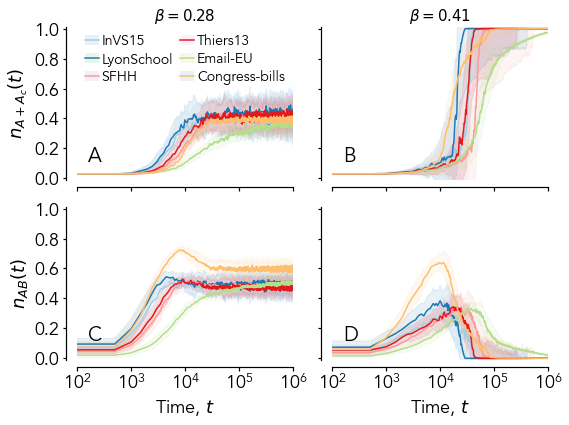

In [4]:
p=0.03
n_runs = 50
datasetlist = ['InVS15','LyonSchool','SFHH','Thiers13','Email-EU','congress-bills']
dataset_strings = ['InVS15','LyonSchool','SFHH','Thiers13','Email-EU','Congress-bills']
colors = [ListedColormap(pltt.colorbrewer.qualitative.Paired_7.mpl_colors)(i) for i in range(0,7)]
sorted_colors = [colors[i] for i in [0, 1, 4, 5, 2, 6]]

time = np.arange(0, 1e6+500, 500)

######################################################################
rule = 'intersection'
######################################################################

fig, ax = plt.subplots(2,2, figsize=(8,6))

beta = 0.2759

#Here I'll store the plots for the legend
pxs = []

for ii, dataset in enumerate(datasetlist):
    
    tensor_A, tensor_AB = [], []       
    for run_id in range(n_runs):
        if dataset in ['Email-EU','congress-bills']:
            fname = '../Results/Simulations/HONG_2words_%s/%s/fixed_p%.2f_varbeta_run%i/HONG_densities_beta%.4f_p%.2f.csv'%(dataset, rule, p, run_id, beta, p)
        else:
            fname = '../Results/Simulations/HONG_2words_Sociopatterns/%s/%s/fixed_p%.2f_varbeta_run%i/HONG_densities_beta%.4f_p%.2f.csv'%(dataset, rule, p, run_id, beta, p)
        df = pd.read_csv(fname)

        #adding values after absorbing state
        if len(df)<2001:
            tensor_A.append(stretch_list(df['n_A+p'].values, 2001))
            tensor_AB.append(stretch_list(df['n_AB'].values, 2001))
        else:
            tensor_A.append(df['n_A+p'].values)
            tensor_AB.append(df['n_AB'].values)

    tensor_A = np.array(tensor_A)
    tensor_AB = np.array(tensor_AB)
    med_tensor_A = np.median(tensor_A, axis=0)
    med_tensor_AB = np.median(tensor_AB, axis=0)
    std_tensor_A = np.std(tensor_A, axis=0)
    std_tensor_AB = np.std(tensor_AB, axis=0)
    
    px = ax[0][0].plot(time, med_tensor_A, color=sorted_colors[ii])
    pxs.append(px[0])
    ax[0][0].fill_between(time, med_tensor_A-std_tensor_A, med_tensor_A+std_tensor_A, color=sorted_colors[ii], alpha=0.1, zorder=0)
    ax[1][0].plot(time, med_tensor_AB, color=sorted_colors[ii])
    ax[1][0].fill_between(time, med_tensor_AB-std_tensor_AB, med_tensor_AB+std_tensor_AB, color=sorted_colors[ii], alpha=0.1, zorder=0)

##############################################################################
    
beta = 0.4138

for ii, dataset in enumerate(datasetlist):
    
    tensor_A, tensor_AB = [], []
    for run_id in range(n_runs):
        if dataset in ['Email-EU','congress-bills']:
            fname = '../Results/Simulations/HONG_2words_%s/%s/fixed_p%.2f_varbeta_run%i/HONG_densities_beta%.4f_p%.2f.csv'%(dataset, rule, p, run_id, beta, p)
        else:
            fname = '../Results/Simulations/HONG_2words_Sociopatterns/%s/%s/fixed_p%.2f_varbeta_run%i/HONG_densities_beta%.4f_p%.2f.csv'%(dataset, rule, p, run_id, beta, p)
        df = pd.read_csv(fname)
        
        #adding values after absorbing state
        if len(df)<2000:
            tensor_A.append(stretch_list(df['n_A+p'].values, 2001))
            tensor_AB.append(stretch_list(df['n_AB'].values, 2001))
        else:
            tensor_A.append(df['n_A+p'].values)
            tensor_AB.append(df['n_AB'].values)
        
    tensor_A = np.array(tensor_A)
    tensor_AB = np.array(tensor_AB)
    med_tensor_A = np.median(tensor_A, axis=0)
    med_tensor_AB = np.median(tensor_AB, axis=0)
    std_tensor_A = np.std(tensor_A, axis=0)
    std_tensor_AB = np.std(tensor_AB, axis=0)
        
    ax[0][1].plot(time, med_tensor_A, color=sorted_colors[ii])
    ax[0][1].fill_between(time, med_tensor_A-std_tensor_A, med_tensor_A+std_tensor_A, color=sorted_colors[ii], alpha=0.1, zorder=0)
    ax[1][1].plot(time, med_tensor_AB, color=sorted_colors[ii])
    ax[1][1].fill_between(time, med_tensor_AB-std_tensor_AB, med_tensor_AB+std_tensor_AB, color=sorted_colors[ii], alpha=0.1, zorder=0)

##############################################################################    
  
ax[1][0].set_xlabel(r'Time, $t$', size=18)
ax[1][1].set_xlabel(r'Time, $t$', size=18)
ax[0][0].set_ylabel(r'$n_{A+A_c}(t)$', size=18)  
ax[1][0].set_ylabel(r'$n_{AB}(t)$', size=18)      
  
axlabels=[['A','B'],['C','D']]
for ii in [0,1]:
    for jj in [0,1]:
        ax[ii][jj].set_xscale('log')
        ax[ii][jj].set_xlim(1e2, 1e6)
        ax[ii][jj].set_yticks([0,0.2,0.4,0.6,0.8,1])
        ax[ii][jj].set_ylim(-0.01, +1.01)
        ax[ii][jj].tick_params(axis='both', which='major', labelsize=18)
        ax[ii][jj].annotate(axlabels[ii][jj], xy=(0.05, 0.12), xycoords="axes fraction", fontsize=20, fontweight="bold")

ax[0][0].set_title(r'$\beta=%.2f$'%0.2759, size=15)
ax[0][1].set_title(r'$\beta=%.2f$'%0.4138, size=15)
    
      
#################################### Adjusting ticks #################################### 
ax[0][0].set_xticklabels([])        
ax[0][1].set_xticklabels([])   
ax[0][1].set_yticklabels([]) 
ax[1][1].set_yticklabels([]) 

ax[0][0].set_xticks([1e2,1e3,1e4,1e5,1e6])
ax[0][1].set_xticks([1e2,1e3,1e4,1e5,1e6])
ax[1][0].set_xticks([1e2,1e3,1e4,1e5,1e6])
ax[1][1].set_xticks([1e2,1e3,1e4,1e5,1e6])

for ii in [0,1]:
    for jj in [0,1]:
        ax[ii,jj].spines['right'].set_color('none')
        ax[ii,jj].spines['top'].set_color('none')
        ax[ii,jj].xaxis.set_ticks_position('bottom')

        ax[ii,jj].spines['bottom'].set_position(('axes', -0.05))
        ax[ii,jj].yaxis.set_ticks_position('left')
        ax[ii,jj].spines['left'].set_position(('axes', -0.05))
            

#################################### LEGEND ####################################

#Creating fillings for legend entries
pxsf = [ax[0][0].fill(np.NaN, np.NaN, color, alpha=0.1)[0] for color in sorted_colors]
#pxsf = [ax[0][0].fill(np.NaN, np.NaN, 'gray', alpha=0.2)[0] for ii in range(6)]

ax[0][0].legend([(pxsf[ii], pxs[ii]) for ii in range(6)],
          [dataset_strings[ii] for ii in range(6)],
          fontsize=14, ncol=2, handlelength=1, frameon=False,
          loc='upper center', labelspacing=0.2, borderpad=0, columnspacing=0.5, handletextpad=0.2)

plt.tight_layout()

filename = "../Figures/NG_nx_vs_time_p003_sim_empdata_4panels.pdf"
plt.savefig(filename, bbox_inches='tight', dpi=150)

## Simulations in homogeneous mixing for each simplex size on empirical data

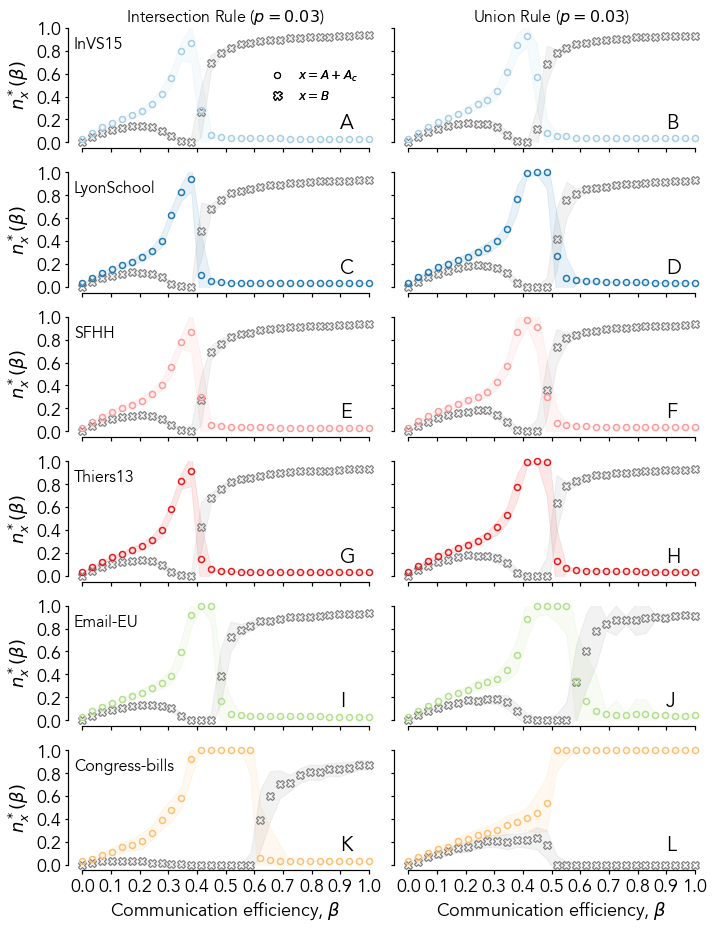

In [5]:
p=0.03
n_runs = 50
datasetlist = ['InVS15','LyonSchool','SFHH','Thiers13','Email-EU','congress-bills']
colors = [ListedColormap(pltt.colorbrewer.qualitative.Paired_7.mpl_colors)(i) for i in range(0,7)]
sorted_colors = [colors[i] for i in [0, 1, 4, 5, 2, 6]]
axlabels = ['A','B','C','D','E','F','G','H','I','J','K','L']

plt.figure(figsize=(10,13))

######################################################################
rule = 'intersection'
######################################################################

for ii, dataset in enumerate(datasetlist):
    
    ax = plt.subplot(len(datasetlist), 2, 1+2*ii)
    
    tensor = []
    for run_id in range(n_runs):
        fname = '../Results/Simulations/HONG_2words_HomMix_datasets/%s/%s/fixed_p%.2f_varbeta_run%i/summary.csv'%(dataset, rule, p, run_id)
        df = pd.read_csv(fname)
        tensor.append(df.to_numpy())
    #Taking the average from simulations and plotting it
    tensor = np.array(tensor)
    med_tensor = np.median(tensor, axis=0)
    std_tensor = np.std(tensor, axis=0)
    med_df = pd.DataFrame(med_tensor, index=None,
                            columns=['beta','avg_n_A+p','std_n_A+p','avg_n_B','std_n_B','avg_n_AB','std_n_AB'])
    std_df = pd.DataFrame(std_tensor, index=None,
                          columns=['beta','avg_n_A+p','std_n_A+p','avg_n_B','std_n_B','avg_n_AB','std_n_AB'])
    ax.plot(med_df['beta'], med_df['avg_n_A+p'], 'o', mfc='None', color=sorted_colors[ii], mec=sorted_colors[ii], zorder=2, mew=1.5, clip_on=False)
    ax.plot(med_df['beta'], med_df['avg_n_B'], 'X', ms=8, mfc='None', color='gray', mec='gray', zorder=1, mew=1.2, clip_on=False)
    ax.fill_between(med_df['beta'], med_df['avg_n_A+p']-std_df['avg_n_A+p'], med_df['avg_n_A+p']+std_df['avg_n_A+p'], color=sorted_colors[ii], alpha=0.1, zorder=0)
    ax.fill_between(med_df['beta'], med_df['avg_n_B']-std_df['avg_n_B'], med_df['avg_n_B']+std_df['avg_n_B'], color='gray', alpha=0.1, zorder=0)    
    
    ax.set_xlim(df['beta'].min(), df['beta'].max())
    if ii==5:
        ax.set_xlabel(r'Communication efficiency, $\beta$', size=18)
    else:
        ax.set_xticklabels([])
    ax.set_ylabel(r'$n_x^*(\beta)$', size=18)
    ax.set_ylim(0,1)
    ax.tick_params(axis='both', which='major', labelsize=18)
    if ii==0: ax.set_title('Intersection Rule ($p=0.03$)', size=16)  
    ax.set_yticks([0,0.2,0.4,0.6,0.8,1])
    ax.set_xticks([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])
    #ax.grid(linewidth=1.5, color='#999999', alpha=0.1, linestyle='--')

    if dataset=='congress-bills':
        dataset_str = dataset.capitalize()
    else:
        dataset_str = dataset
    ax.annotate(dataset_str, xy=(-0.03, 0.82), xycoords="axes fraction", fontsize=16)
    
    if ii==0:
        handles = [Line2D([0], [0], marker='o', linestyle='', mfc='white', color='black', mec='black', mew=1.2),
           Line2D([0], [0], marker='X', ms=9, linestyle='', mfc='white', color='black', mec='black', mew=1.2)]
        labels = [r'$x=A+A_c$', r'$x=B$']
        lg2 = ax.legend(handles, labels, loc='center right', fontsize='large', frameon=False)
        ax.add_artist(lg2)
    
    ax.annotate(axlabels[2*ii], xy=(0.9, 0.12), xycoords="axes fraction", fontsize=20, fontweight="bold")

    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.spines['bottom'].set_position(('axes', -0.05))
    ax.yaxis.set_ticks_position('left')
    ax.spines['left'].set_position(('axes', -0.05))

################################################################################
rule = 'union'
################################################################################

for ii, dataset in enumerate(datasetlist):
    
    ax = plt.subplot(len(datasetlist), 2, 2+2*ii)
    
    tensor = []
    for run_id in range(n_runs):
        fname = '../Results/Simulations/HONG_2words_HomMix_datasets/%s/%s/fixed_p%.2f_varbeta_run%i/summary.csv'%(dataset, rule, p, run_id)
        df = pd.read_csv(fname)
        tensor.append(df.to_numpy())
    #Taking the average from simulations and plotting it
    tensor = np.array(tensor)
    med_tensor = np.median(tensor, axis=0)
    std_tensor = np.std(tensor, axis=0)
    med_df = pd.DataFrame(med_tensor, index=None,
                            columns=['beta','avg_n_A+p','std_n_A+p','avg_n_B','std_n_B','avg_n_AB','std_n_AB'])
    std_df = pd.DataFrame(std_tensor, index=None,
                          columns=['beta','avg_n_A+p','std_n_A+p','avg_n_B','std_n_B','avg_n_AB','std_n_AB'])
    ax.plot(med_df['beta'], med_df['avg_n_A+p'], 'o', mfc='None', color=sorted_colors[ii], mec=sorted_colors[ii], zorder=2, mew=1.5, clip_on=False)
    ax.plot(med_df['beta'], med_df['avg_n_B'], 'X', ms=8, mfc='None', color='gray', mec='gray', zorder=1, mew=1.2, clip_on=False)
    ax.fill_between(med_df['beta'], med_df['avg_n_A+p']-std_df['avg_n_A+p'], med_df['avg_n_A+p']+std_df['avg_n_A+p'], color=sorted_colors[ii], alpha=0.1, zorder=0)
    ax.fill_between(med_df['beta'], med_df['avg_n_B']-std_df['avg_n_B'], med_df['avg_n_B']+std_df['avg_n_B'], color='gray', alpha=0.1, zorder=0)

    if ii==5:
        ax.set_xlabel(r'Communication efficiency, $\beta$', size=18)
    else:
        ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_xlim(df['beta'].min(), df['beta'].max())
    ax.set_ylim(0,1)
    ax.tick_params(axis='both', which='major', labelsize=18)
    if ii==0: ax.set_title('Union Rule ($p=0.03$)', size=16)  
    ax.set_yticks([0,0.2,0.4,0.6,0.8,1])
    ax.set_xticks([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])
    #ax.grid(linewidth=1.5, color='#999999', alpha=0.1, linestyle='--')
    
    ax.annotate(axlabels[2*ii+1], xy=(0.9, 0.12), xycoords="axes fraction", fontsize=20, fontweight="bold")

    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.spines['bottom'].set_position(('axes', -0.05))
    ax.yaxis.set_ticks_position('left')
    ax.spines['left'].set_position(('axes', -0.05))
    
plt.tight_layout()

filename = "../Figures/NG_nx_vs_beta_p003_HomMix_sim_empdata.pdf"
plt.savefig(filename, bbox_inches='tight', dpi=150)

# Mean field 

In [2]:
import seaborn as sns
sns.set_style({'font.family':'Avenir', 'font.scale':1.5})

In [3]:
df = pd.read_csv("../Results/NGCM_intersection_heatmap_beta_p.csv")

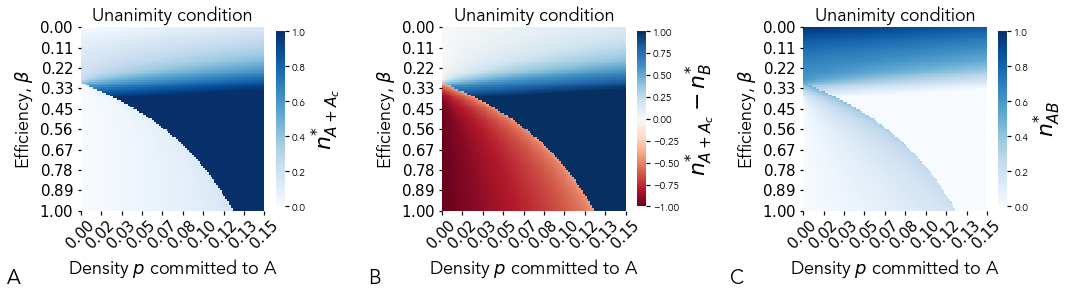

In [4]:
plt.figure(figsize=(15,5))

ax=plt.subplot(131)############################################################

matrix = pd.pivot_table(df, index='beta', columns='p', values='n_a')

sns.heatmap(matrix, xticklabels=False, yticklabels=False, cmap=plt.cm.Blues,
            ax=ax, vmin=0, vmax=1, square=True, cbar=True, cbar_kws={"shrink": .6}) 
ax.figure.axes[-1].set_ylabel(r'$n_{A+A_c}^{*}$', size=22)

ax.set_xlabel(r'Density $p$ committed to A', size=18)
ax.set_ylabel(r'Efficiency, $\beta$', size=18)

xticks = np.linspace(0,100,10)
yticks = np.linspace(0,100,10)
xtickslabels = [r'$%.2f$'%s for s in np.linspace(0.001,0.15,10)]
ytickslabels = [r'$%.2f$'%s for s in np.linspace(0.001,1,10)]

ax.set_xticks(xticks) 
ax.set_yticks(yticks) 
ax.set_xticklabels(xtickslabels, size=15, rotation=45)
ax.set_yticklabels(ytickslabels, size=15);

ax.annotate('A', xy=(-0.4, -0.4), xycoords="axes fraction", fontsize=20, fontweight="bold")

ax.set_title('Unanimity condition', size=18)

ax=plt.subplot(132)############################################################

df['n_a-n_b'] = df['n_a']-df['n_b']
matrix = pd.pivot_table(df, index='beta', columns='p', values='n_a-n_b')

sns.heatmap(matrix, xticklabels=False, yticklabels=False, cmap=plt.cm.RdBu,
            ax=ax, vmin=-1, vmax=1, square=True, cbar=True, cbar_kws={"shrink": .6}) 
ax.figure.axes[-1].set_ylabel(r'$n_{A+A_c}^{*}-n_B^{*}$', size=22)

ax.set_xlabel(r'Density $p$ committed to A', size=18)
ax.set_ylabel(r'Efficiency, $\beta$', size=18)

xticks = np.linspace(0,100,10)
yticks = np.linspace(0,100,10)
xtickslabels = [r'$%.2f$'%s for s in np.linspace(0.001,0.15,10)]
ytickslabels = [r'$%.2f$'%s for s in np.linspace(0.001,1,10)]

ax.set_xticks(xticks) 
ax.set_yticks(yticks) 
ax.set_xticklabels(xtickslabels, size=15, rotation=45)
ax.set_yticklabels(ytickslabels, size=15);

ax.annotate('B', xy=(-0.4, -0.4), xycoords="axes fraction", fontsize=20, fontweight="bold")

ax.set_title('Unanimity condition', size=18)

ax=plt.subplot(133)############################################################

df['n_ab'] = 1.-df['n_a']-df['n_b']
matrix = pd.pivot_table(df, index='beta', columns='p', values='n_ab')

sns.heatmap(matrix, xticklabels=False, yticklabels=False, cmap=plt.cm.Blues,
            ax=ax, vmin=0, vmax=1, square=True, cbar=True, cbar_kws={"shrink": .6}) 
ax.figure.axes[-1].set_ylabel(r'$n_{AB}^{*}$', size=22)

ax.set_xlabel(r'Density $p$ committed to A', size=18)
ax.set_ylabel(r'Efficiency, $\beta$', size=18)

xticks = np.linspace(0,100,10)
yticks = np.linspace(0,100,10)
xtickslabels = [r'$%.2f$'%s for s in np.linspace(0.001,0.15,10)]
ytickslabels = [r'$%.2f$'%s for s in np.linspace(0.001,1,10)]

ax.set_xticks(xticks) 
ax.set_yticks(yticks) 
ax.set_xticklabels(xtickslabels, size=15, rotation=45)
ax.set_yticklabels(ytickslabels, size=15);

ax.annotate('C', xy=(-0.4, -0.4), xycoords="axes fraction", fontsize=20, fontweight="bold")

ax.set_title('Unanimity condition', size=18)

plt.tight_layout()

filename = "../Figures/NGCM_intersection_heatmap.png"
plt.savefig(filename, bbox_inches='tight', dpi=300, facecolor='white', transparent=False)

In [5]:
df = pd.read_csv("../Results/NGCM_union_heatmap_beta_p.csv")

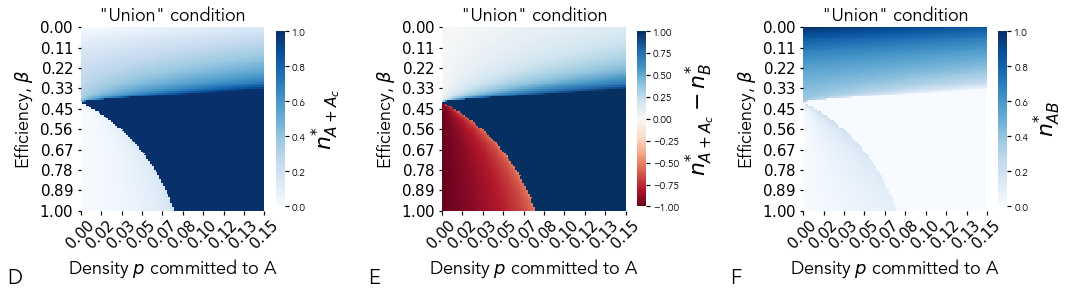

In [6]:
plt.figure(figsize=(15,5))

ax=plt.subplot(131)############################################################

matrix = pd.pivot_table(df, index='beta', columns='p', values='n_a')

sns.heatmap(matrix, xticklabels=False, yticklabels=False, cmap=plt.cm.Blues,
            ax=ax, vmin=0, vmax=1, square=True, cbar=True, cbar_kws={"shrink": .6}) 
ax.figure.axes[-1].set_ylabel(r'$n_{A+A_c}^{*}$', size=22)

ax.set_xlabel(r'Density $p$ committed to A', size=18)
ax.set_ylabel(r'Efficiency, $\beta$', size=18)

xticks = np.linspace(0,100,10)
yticks = np.linspace(0,100,10)
xtickslabels = [r'$%.2f$'%s for s in np.linspace(0.001,0.15,10)]
ytickslabels = [r'$%.2f$'%s for s in np.linspace(0.001,1,10)]

ax.set_xticks(xticks) 
ax.set_yticks(yticks) 
ax.set_xticklabels(xtickslabels, size=15, rotation=45)
ax.set_yticklabels(ytickslabels, size=15);

ax.annotate('D', xy=(-0.4, -0.4), xycoords="axes fraction", fontsize=20, fontweight="bold")

ax.set_title('"Union" condition', size=18)

ax=plt.subplot(132)############################################################

df['n_a-n_b'] = df['n_a']-df['n_b']
matrix = pd.pivot_table(df, index='beta', columns='p', values='n_a-n_b')

sns.heatmap(matrix, xticklabels=False, yticklabels=False, cmap=plt.cm.RdBu,
            ax=ax, vmin=-1, vmax=1, square=True, cbar=True, cbar_kws={"shrink": .6}) 
ax.figure.axes[-1].set_ylabel(r'$n_{A+A_c}^{*}-n_B^{*}$', size=22)

ax.set_xlabel(r'Density $p$ committed to A', size=18)
ax.set_ylabel(r'Efficiency, $\beta$', size=18)

xticks = np.linspace(0,100,10)
yticks = np.linspace(0,100,10)
xtickslabels = [r'$%.2f$'%s for s in np.linspace(0.001,0.15,10)]
ytickslabels = [r'$%.2f$'%s for s in np.linspace(0.001,1,10)]

ax.set_xticks(xticks) 
ax.set_yticks(yticks) 
ax.set_xticklabels(xtickslabels, size=15, rotation=45)
ax.set_yticklabels(ytickslabels, size=15);

ax.annotate('E', xy=(-0.4, -0.4), xycoords="axes fraction", fontsize=20, fontweight="bold")

ax.set_title('"Union" condition', size=18)

ax=plt.subplot(133)############################################################

df['n_ab'] = 1.-df['n_a']-df['n_b']
matrix = pd.pivot_table(df, index='beta', columns='p', values='n_ab')

sns.heatmap(matrix, xticklabels=False, yticklabels=False, cmap=plt.cm.Blues,
            ax=ax, vmin=0, vmax=1, square=True, cbar=True, cbar_kws={"shrink": .6}) 
ax.figure.axes[-1].set_ylabel(r'$n_{AB}^{*}$', size=22)

ax.set_xlabel(r'Density $p$ committed to A', size=18)
ax.set_ylabel(r'Efficiency, $\beta$', size=18)

xticks = np.linspace(0,100,10)
yticks = np.linspace(0,100,10)
xtickslabels = [r'$%.2f$'%s for s in np.linspace(0.001,0.15,10)]
ytickslabels = [r'$%.2f$'%s for s in np.linspace(0.001,1,10)]

ax.set_xticks(xticks) 
ax.set_yticks(yticks) 
ax.set_xticklabels(xtickslabels, size=15, rotation=45)
ax.set_yticklabels(ytickslabels, size=15);

ax.annotate('F', xy=(-0.4, -0.4), xycoords="axes fraction", fontsize=20, fontweight="bold")

ax.set_title('"Union" condition', size=18)

plt.tight_layout()

filename = "../Figures/NGCM_union_heatmap.png"
plt.savefig(filename, bbox_inches='tight', dpi=300, facecolor='white', transparent=False)

In [7]:
df = pd.read_csv("../Results/NGCM_pairwise_heatmap_beta_p.csv")

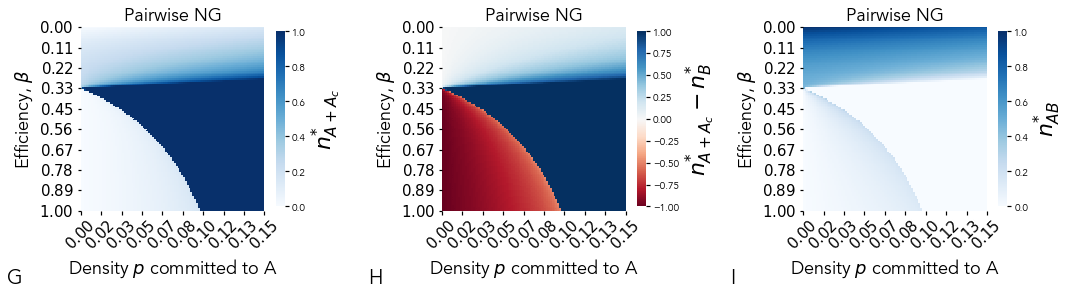

In [8]:
plt.figure(figsize=(15,5))

ax=plt.subplot(131)############################################################

matrix = pd.pivot_table(df, index='beta', columns='p', values='n_a')

sns.heatmap(matrix, xticklabels=False, yticklabels=False, cmap=plt.cm.Blues,
            ax=ax, vmin=0, vmax=1, square=True, cbar=True, cbar_kws={"shrink": .6}) 
ax.figure.axes[-1].set_ylabel(r'$n_{A+A_c}^{*}$', size=22)

ax.set_xlabel(r'Density $p$ committed to A', size=18)
ax.set_ylabel(r'Efficiency, $\beta$', size=18)

xticks = np.linspace(0,100,10)
yticks = np.linspace(0,100,10)
xtickslabels = [r'$%.2f$'%s for s in np.linspace(0.001,0.15,10)]
ytickslabels = [r'$%.2f$'%s for s in np.linspace(0.001,1,10)]

ax.set_xticks(xticks) 
ax.set_yticks(yticks) 
ax.set_xticklabels(xtickslabels, size=15, rotation=45)
ax.set_yticklabels(ytickslabels, size=15);

ax.annotate('G', xy=(-0.4, -0.4), xycoords="axes fraction", fontsize=20, fontweight="bold")

ax.set_title('Pairwise NG', size=18)

ax=plt.subplot(132)############################################################

df['n_a-n_b'] = df['n_a']-df['n_b']
matrix = pd.pivot_table(df, index='beta', columns='p', values='n_a-n_b')

sns.heatmap(matrix, xticklabels=False, yticklabels=False, cmap=plt.cm.RdBu,
            ax=ax, vmin=-1, vmax=1, square=True, cbar=True, cbar_kws={"shrink": .6}) 
ax.figure.axes[-1].set_ylabel(r'$n_{A+A_c}^{*}-n_B^{*}$', size=22)

ax.set_xlabel(r'Density $p$ committed to A', size=18)
ax.set_ylabel(r'Efficiency, $\beta$', size=18)

xticks = np.linspace(0,100,10)
yticks = np.linspace(0,100,10)
xtickslabels = [r'$%.2f$'%s for s in np.linspace(0.001,0.15,10)]
ytickslabels = [r'$%.2f$'%s for s in np.linspace(0.001,1,10)]

ax.set_xticks(xticks) 
ax.set_yticks(yticks) 
ax.set_xticklabels(xtickslabels, size=15, rotation=45)
ax.set_yticklabels(ytickslabels, size=15);

ax.annotate('H', xy=(-0.4, -0.4), xycoords="axes fraction", fontsize=20, fontweight="bold")

ax.set_title('Pairwise NG', size=18)

ax=plt.subplot(133)############################################################

df['n_ab'] = 1.-df['n_a']-df['n_b']
matrix = pd.pivot_table(df, index='beta', columns='p', values='n_ab')

sns.heatmap(matrix, xticklabels=False, yticklabels=False, cmap=plt.cm.Blues,
            ax=ax, vmin=0, vmax=1, square=True, cbar=True, cbar_kws={"shrink": .6}) 
ax.figure.axes[-1].set_ylabel(r'$n_{AB}^{*}$', size=22)

ax.set_xlabel(r'Density $p$ committed to A', size=18)
ax.set_ylabel(r'Efficiency, $\beta$', size=18)

xticks = np.linspace(0,100,10)
yticks = np.linspace(0,100,10)
xtickslabels = [r'$%.2f$'%s for s in np.linspace(0.001,0.15,10)]
ytickslabels = [r'$%.2f$'%s for s in np.linspace(0.001,1,10)]

ax.set_xticks(xticks) 
ax.set_yticks(yticks) 
ax.set_xticklabels(xtickslabels, size=15, rotation=45)
ax.set_yticklabels(ytickslabels, size=15);

ax.annotate('I', xy=(-0.4, -0.4), xycoords="axes fraction", fontsize=20, fontweight="bold")

ax.set_title('Pairwise NG', size=18)

plt.tight_layout()

filename = "../Figures/NGCM_pairwise_heatmap.png"
plt.savefig(filename, bbox_inches='tight', dpi=300, facecolor='white', transparent=False)

In [9]:
def get_Delta_beta(df):
    """
    Given a dataframe with columns beta, p, n_a,
    it returns the range of beta (as a function of p) for which n_a is 1
    """
    ps, Delta_betas = [], []

    for i, p in enumerate(df['p'].unique()):
        dfx = df[(df['p']==p)&(df['n_a'].astype(int)==1)]
        Delta_beta = dfx['beta'].max()-dfx['beta'].min()
        ps.append(p)
        Delta_betas.append(Delta_beta)
        Delta_betas = pd.Series(Delta_betas).fillna(0).tolist() 
        
    return ps, Delta_betas

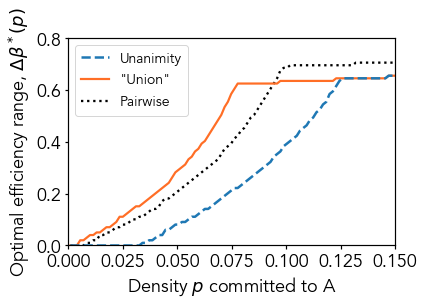

In [13]:
plt.figure(figsize=(6,4))

colors = [ListedColormap(pltt.colorbrewer.qualitative.Paired_3.mpl_colors)(i) for i in range(3)]

ax=plt.subplot(111)
############################################################ INTERSECTION
df = pd.read_csv("../Results/NGCM_intersection_heatmap_beta_p.csv")
ps, Delta_betas = get_Delta_beta(df)
ax.plot(ps, Delta_betas, '--', lw=2.5, label='Unanimity', color=colors[1], zorder=2)
############################################################ UNION
df = pd.read_csv("../Results/NGCM_union_heatmap_beta_p.csv")
ps, Delta_betas = get_Delta_beta(df)
ax.plot(ps, Delta_betas, '-', lw=2.2, label='"Union"', color='#ff6e26', zorder=1)
############################################################ PAIRWISE
df = pd.read_csv("../Results/NGCM_pairwise_heatmap_beta_p.csv")
ps, Delta_betas = get_Delta_beta(df)
ax.plot(ps, Delta_betas, ':', lw=2.3, label='Pairwise', color='black', zorder=0)

ax.set_xlim(0, max(ps))
ax.set_ylim(0, 0.8)
ax.tick_params(axis='both', which='major', labelsize=18)
ax.set_xlabel(r'Density $p$ committed to A', size=18)
ax.set_ylabel(r'Optimal efficiency range, $\Delta\beta^*(p)$', size=18)

ax.legend(fontsize=14)

plt.tight_layout()

filename = "../Figures/Optimal_beta_range_vs_p.pdf"
plt.savefig(filename, bbox_inches='tight', dpi=150)

## Converting heatmaps to 3D plots

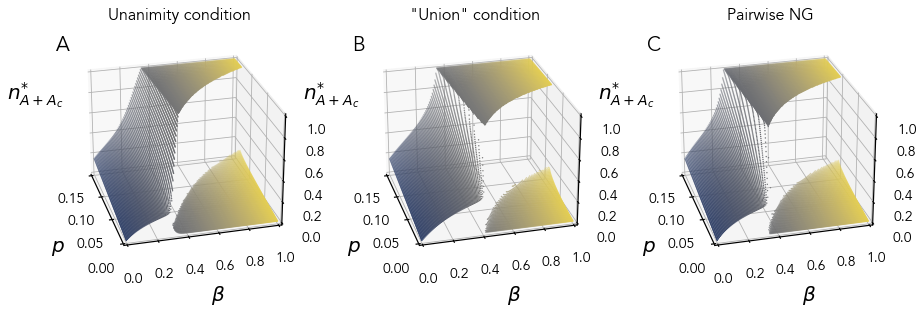

In [14]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(15,5))

df = pd.read_csv("../Results/NGCM_intersection_dense_heatmap_beta_p.csv")
ax = fig.add_subplot(131, projection='3d')############################################################

ax.view_init(azim=-15, elev=25)
ax.tick_params(axis='both', which='major', labelsize=14, pad=10)
ax.set_xlabel(r'$p$', size=20, labelpad=20);
ax.yaxis.set_rotate_label(False)  # disable automatic rotation
ax.set_ylabel(r'$\beta$', size=20, rotation=0, labelpad=20);
ax.zaxis.set_rotate_label(False)  # disable automatic rotation
#ax.set_zlabel(r'$n_A^{*}+p$', size=20, rotation=0, labelpad=10);
ax.annotate(r'$n_{A+A_c}^{*}$', xy=(-0.2, 0.7), xycoords="axes fraction", fontsize=20)

lenp = len(df['p'].unique())
betas = list(df['beta'].unique())
rangec = np.linspace(0.2,0.9,len(betas))
colors = [plt.cm.cividis(i) for i in rangec]

for i, beta in enumerate(betas):
    dfx = df[df['beta']==beta]
    ax.scatter(dfx['p'], [beta]*lenp, dfx['n_a'], '-', color=colors[i], linewidth=0, s=2)
        
#beta = 0.5507852348993288
#dfx = df[df['beta']==beta]
#ax.plot(dfx['p'], [beta]*lenp, dfx['n_a'], '--', color='black', linewidth=2.5);

ax.set_xlim(0,0.15)
ax.set_ylim(0,1)
ax.set_zlim(0,1)

ax.invert_xaxis()

ax.annotate('A', xy=(0, 0.9), xycoords="axes fraction", fontsize=20, fontweight="bold")
ax.set_title('Unanimity condition', size=16);

df = pd.read_csv("../Results/NGCM_union_dense_heatmap_beta_p.csv")
ax = fig.add_subplot(132, projection='3d')############################################################

ax.view_init(azim=-15, elev=25)
ax.tick_params(axis='both', which='major', labelsize=14, pad=10)
ax.set_xlabel(r'$p$', size=20, labelpad=20);
ax.yaxis.set_rotate_label(False)  # disable automatic rotation
ax.set_ylabel(r'$\beta$', size=20, rotation=0, labelpad=20);
ax.zaxis.set_rotate_label(False)  # disable automatic rotation
#ax.set_zlabel(r'$n_A^{*}+p$', size=20, rotation=0, labelpad=10);
ax.annotate(r'$n_{A+A_c}^{*}$', xy=(-0.2, 0.7), xycoords="axes fraction", fontsize=20)

lenp = len(df['p'].unique())
betas = list(df['beta'].unique())
rangec = np.linspace(0.2,0.9,len(betas))
colors = [plt.cm.cividis(i) for i in rangec]

for i, beta in enumerate(betas):
    dfx = df[df['beta']==beta]
    ax.scatter(dfx['p'], [beta]*lenp, dfx['n_a'], '-', color=colors[i], linewidth=0, s=2)
        
#beta = 0.5507852348993288
#dfx = df[df['beta']==beta]
#ax.plot(dfx['p'], [beta]*lenp, dfx['n_a'], '--', color='black', linewidth=2.5);

ax.set_xlim(0,0.15)
ax.set_ylim(0,1)
ax.set_zlim(0,1)

ax.invert_xaxis()

ax.annotate('B', xy=(0, 0.9), xycoords="axes fraction", fontsize=20, fontweight="bold")
ax.set_title('"Union" condition', size=16);

df = pd.read_csv("../Results/NGCM_pairwise_dense_heatmap_beta_p.csv")
ax = fig.add_subplot(133, projection='3d')############################################################

ax.view_init(azim=-15, elev=25)
ax.tick_params(axis='both', which='major', labelsize=14, pad=10)
ax.set_xlabel(r'$p$', size=20, labelpad=20);
ax.yaxis.set_rotate_label(False)  # disable automatic rotation
ax.set_ylabel(r'$\beta$', size=20, rotation=0, labelpad=20);
ax.zaxis.set_rotate_label(False)  # disable automatic rotation
#ax.set_zlabel(r'$n_A^{*}+p$', size=20, rotation=0, labelpad=10);
ax.annotate(r'$n_{A+A_c}^{*}$', xy=(-0.2, 0.7), xycoords="axes fraction", fontsize=20)

lenp = len(df['p'].unique())
betas = list(df['beta'].unique())
rangec = np.linspace(0.2,0.9,len(betas))
colors = [plt.cm.cividis(i) for i in rangec]

for i, beta in enumerate(betas):
    dfx = df[df['beta']==beta]
    ax.scatter(dfx['p'], [beta]*lenp, dfx['n_a'], '-', color=colors[i], linewidth=0, s=2)
        
#beta = 0.5507852348993288
#dfx = df[df['beta']==beta]
#ax.plot(dfx['p'], [beta]*lenp, dfx['n_a'], '--', color='black', linewidth=2.5);

ax.set_xlim(0,0.15)
ax.set_ylim(0,1)
ax.set_zlim(0,1)

ax.invert_xaxis()

ax.annotate('C', xy=(0, 0.9), xycoords="axes fraction", fontsize=20, fontweight="bold")
ax.set_title('Pairwise NG', size=16);

#plt.tight_layout()

filename = "../Figures/NGCM_3Dplots.png"
plt.savefig(filename, bbox_inches='tight', dpi=300, facecolor='white', transparent=False)